**PROJECT PIPELINE**

- Understanding of Data (Problem Statement)

- Data Preprocessing - checked null values, attribute types, duplicate values etc.

- Data Visualization -
  -Count plot for categorical columns
  - Violin plot for numerical columns
  - Time series analysis of numerical columns (month wise, day wise, hour wise, minute wise)
  - Line plot for Daily analysis of numerical columns
  - Boxplot of numerical columns over months

- ML pipeline
  - Feature selection using correlation analysis
  - Splitting of data
  - Scaling of data
  - Model Fitting and Hyperparameter Tuning
      - Linear Regression
      -  Polynomial Regression
      - Ridge Regression
      -  Random Forest Regressor
  - Optimisation
      - SGDRegressor
  - Time Series Prediction using
      - Linear regression
      -  ARIMA (Daily basis, Hourly basis)
  - Model Evaluation
    - RMSE
    - MAE
    - R2 SCORE
    - NMSE


- **Assigned Dataset :** Metro Train Air Compressor Unit Dataset
-**Link :** https://www.kaggle.com/datasets/anshtanwar/metro-train-dataset
- **Basic Description :** This Dataset contains readings from pressure, temperature, motor current, and air intake valves were collected from a compressor's Air Production Unit (APU) from a metro train.

- **Data Source:** The data is collected from analogue and digital sensors installed on the APU(Air Processing Unit) of a metro train's compressor. These sensors monitor different aspects of the compressor's operation.

- **Sensors:** The dataset includes readings from the following sensors:

  - **Pressure Sensor:**Monitors pressure levels within the APU.
  - **Temperature Sensor:** Measures the temperature of the APU.
  - **Motor Current Sensor:** Records the electrical current consumed by the compressor's motor.
  - **Air Intake Valve Sensor:** Monitors the status or position of the air intake valve.


- **What is APU?**\
An APU, or Air Processing Unit, in the context of a metro train's compressor, refers to a component that plays a crucial role in providing clean and conditioned air for various systems within the train. The APU is responsible for filtering, cooling, and sometimes heating the air before it is distributed to different parts of the train, ensuring a comfortable and safe environment for passengers and crew.

- **Problem Statement :** On thorough analysis of the dataset, we observed that the most interesting problem was predicting motor current, for which we used two approaches.

  **1. Prediction of motor current using regression techniques:** Following the basic ML pipeline of representation, evaluation and optimization of models like linear regression, polynomial regression, ridge regression and random forest.

  **2. Prediction using time series:** This was done in two ways -
    - On an hourly basis as well as daily basis using ARIMA model.

    - Prediction using linear regression wrt time

## **Exploratory Data Analysis (EDA) & Preprocessing:**

T1. Explore the dataset assigned to your team and provide:


### a. A summary of the dataset (should include information columns present, attribute types, null values, and a summary of each attribute).

In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np

In [ ]:
# Mounting Google drive to fetch dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [ ]:
# Getting first five instances of dataset
df.head(5)

Unnamed: 0            timestamp    TP2    TP3     H1  DV_pressure  \
0           0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1          10  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2          20  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3          30  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4          40  2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   

   Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  \
0       9.358           53.600         0.0400   1.0         0.0     1.0  1.0   
1       9.348           53.675         0.0400   1.0         0.0     1.0  1.0   
2       9.338           53.600         0.0425   1.0         0.0     1.0  1.0   
3       9.328           53.425         0.0400   1.0         0.0     1.0  1.0   
4       9.318           53.475         0.0400   1.0         0.0     1.0  1.0   

   LPS  Pressure_switch  Oil_level  Caudal_impulses  
0  0.0              1.0        1.0              1.0  
1  0.0              1.0        1.0              1.0  
2  0.0              1.0        1.0              1.0  
3  0.0              1.0        1.0              1.0  
4  0.0              1.0        1.0              1.0

In [ ]:
# Getting the shape of dataset
df.shape

(1516948, 17)

In [ ]:
# Getting the names of columns present in the dataset
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [ ]:
# Getting column/attribute type
df.dtypes

Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object

Only one categorical variable "timestamp" and rest are numerical variables/attributes.\
**No need for Encoding**

### Pre-Processing


In [ ]:
# Checking null values
df.isnull().sum()

Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64

**No null values are present.**

In [ ]:
#Checking duplicate rows
df.duplicated().sum()

0

**No Duplicate Instances are present.**

In [ ]:
# Droping Unnecessary columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# Converting 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Getting number unique values for each column
df.nunique()

timestamp          1516948
TP2                   5257
TP3                   3683
H1                    2665
DV_pressure           2257
Reservoirs            3682
Oil_temperature       2462
Motor_current         1809
COMP                     2
DV_eletric               2
Towers                   2
MPG                      2
LPS                      2
Pressure_switch          2
Oil_level                2
Caudal_impulses          2
dtype: int64

**Observation**
- some columns may be nominal/ordinal type since only two unique values for them.


In [ ]:
# Getting categorical columns which are already encoded
cat_cols = []
num_cols = []
col = df.columns
for i in col:
  cnt = df[i].nunique()
  if df[i].dtypes != 'datetime64[ns]':
    if cnt <= 2 :
      val = sorted(df[i].unique())
      print(f'unique values for {i}: {val}')
      print(f'value counts {i}: {cnt}\n')
      cat_cols.append(i)
    else:
      num_cols.append(i)


unique values for COMP: [0.0, 1.0]
value counts COMP: 2

unique values for DV_eletric: [0.0, 1.0]
value counts DV_eletric: 2

unique values for Towers: [0.0, 1.0]
value counts Towers: 2

unique values for MPG: [0.0, 1.0]
value counts MPG: 2

unique values for LPS: [0.0, 1.0]
value counts LPS: 2

unique values for Pressure_switch: [0.0, 1.0]
value counts Pressure_switch: 2

unique values for Oil_level: [0.0, 1.0]
value counts Oil_level: 2

unique values for Caudal_impulses: [0.0, 1.0]
value counts Caudal_impulses: 2



In [ ]:
# Categorical columns
cat_cols

['COMP',
 'DV_eletric',
 'Towers',
 'MPG',
 'LPS',
 'Pressure_switch',
 'Oil_level',
 'Caudal_impulses']

In [ ]:
# Numerical columns
num_cols

['TP2',
 'TP3',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current']

- 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current' are quantitative variables.
- 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses' are qualitative variables. Moreover, these variables are binary in nature.

**Dataset Attribute Descriptions:**

(researched plus taken from assigned dataset description)

1. **Timestamp [Numerical] :** The 'timestamp' attribute denotes the time at which the recorded readings were taken. It provides a temporal reference for the dataset, allowing for time-based analysis.

2. **TP2 [Numerical] :** TP2 represents readings from a pressure sensor. It measures the pressure on the compressor, providing insights into the compressor's operating conditions.

3. **TP3 [Numerical] :** Similar to TP2, TP3 measures pressure, but it specifically gauges the pressure generated at the pneumatic panel. It offers information about the pneumatic system's performance.

4. **H1 [Numerical] :** H1 readings come from a pressure sensor and reflect the pressure generated due to pressure drop when the discharge of the cyclonic separator filter occurs. This attribute is essential for understanding the efficiency of the separator filter.

5. **DV_pressure [Numerical] :** DV_pressure readings are captured by a pressure sensor. A zero reading indicates that the compressor is operating under load. This attribute is critical for monitoring the load status of the compressor.

6. **Reservoirs [Numerical] :** The 'Reservoirs' attribute provides readings related to reservoirs. It measures the downstream pressure of the reservoirs, ideally aligning with the pneumatic panel pressure (TP3). This data is valuable for assessing the performance of the reservoir system.

7. **Oil_temperature [Numerical] :** This attribute records the temperature of the oil within the compressor. Monitoring oil temperature is crucial for ensuring the optimal functioning of the compressor and preventing overheating.

8. **Motor_current [Numerical] :** Motor_current readings represent the current of one phase of the three-phase motor. These readings can vary based on the motor's operational state:
  - 0A (off),
  - 4A (offloaded),
  - 7A (under load), and
  - 9A (start-up).\
Understanding motor current is essential for assessing motor health and operational status.

9. **COMP [Binary Encoded] :** The 'COMP' attribute pertains to the electrical signal of the air intake valve on the compressor. It is active when there is no air intake, indicating that the compressor is either turned off or operating in an offloaded state.

10. **DV_electric [Binary Encoded] :** DV_electric readings correspond to an electrical signal that controls the compressor outlet valve.
  - active when the compressor is functioning under load and
  - inactive when the compressor is either off or operating in an offloaded state.

11. **Towers  [Binary Encoded] :** The 'Towers' attribute relates to an electrical signal that defines the tower responsible for drying the air and the tower responsible for draining humidity from the air.
  - when not active, it indicates that tower one is functioning
  - when active, it indicates that tower two is in operation.

12. **MPG  [Binary Encoded] :** MPG readings measure an electrical signal responsible for starting the compressor under load by activating the intake valve when the pressure in the air production unit (APU) falls below 8.2 bar. It plays a crucial role in compressor operation.

13. **LPS [Binary Encoded] :** LPS(Low Pressure System) readings measure an electrical signal that detects and activates when the pressure in the low-pressure system drops below 7 bars. This signal is essential for maintaining safe pressure levels.

14. **Pressure_switch  [Binary Encoded] :** This attribute captures readings from a pressure switch that detects the discharge in the air-drying towers. It helps monitor the operation of the air-drying system.

15. **Oil_level [Binary Encoded] :** Oil_level readings measure an electrical signal that detects the oil level within the compressor. It becomes active when the oil falls below expected values, indicating potential issues with oil levels.

16. **Caudal_impulses [Binary Encoded] :** Caudal_impulses represent an electrical signal that counts pulse outputs generated by the absolute amount of air flowing from the APU to the reservoirs.






### b. Data Visualization, summarizing insights about the dataset through EDA.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Custom color palette # source seaborn documentation
palette = sns.cubehelix_palette(start=-0.2,rot=0.6, reverse=True)
color=sns.light_palette("#a275ac")

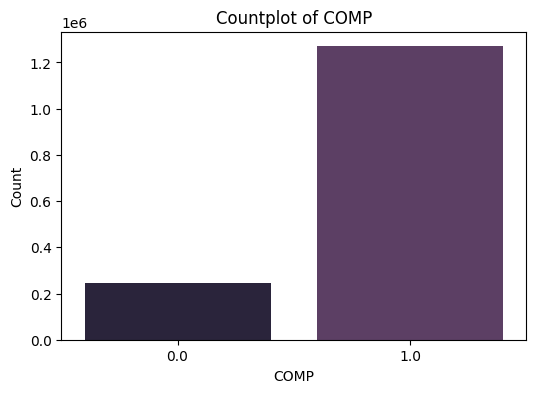

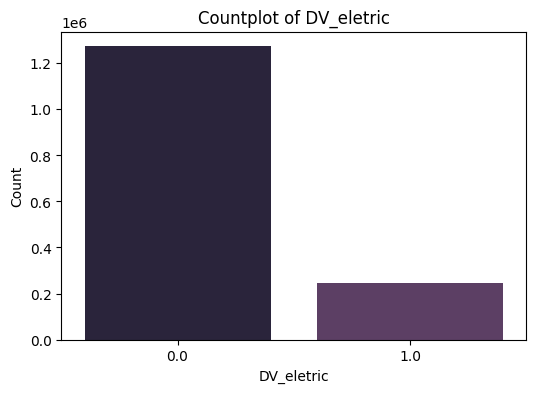

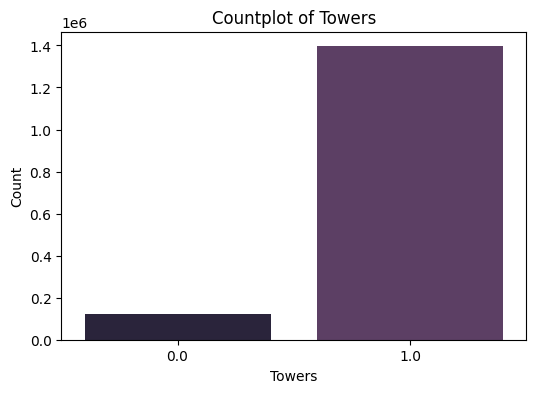

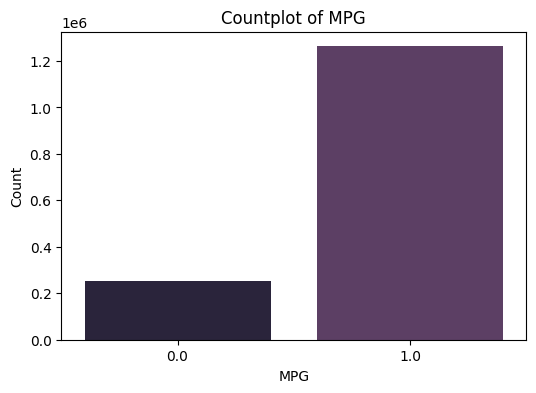

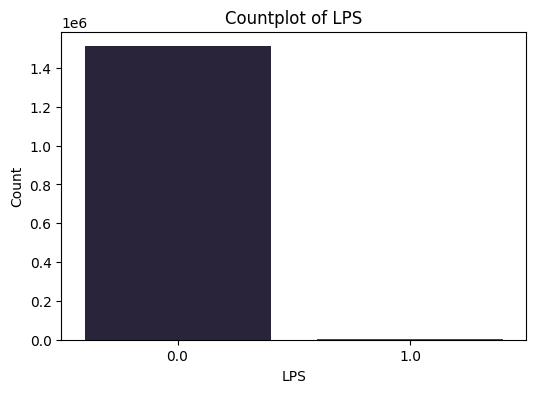

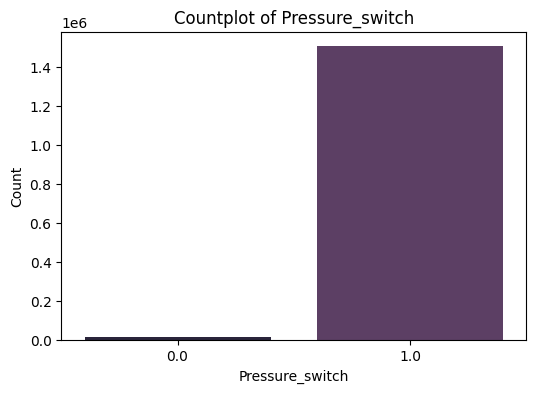

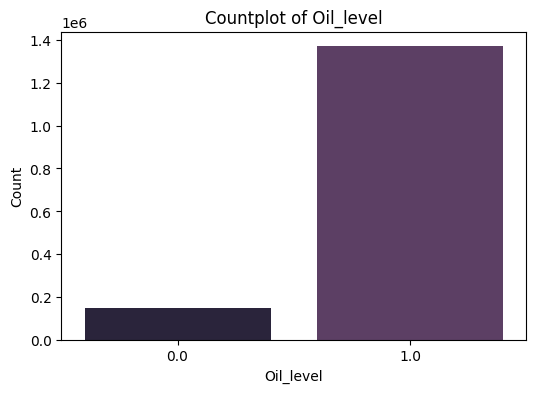

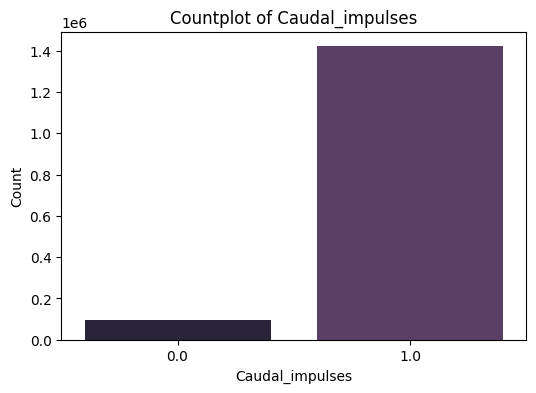

In [ ]:
# Countplot of the encoded categorical columns
for i, col in enumerate(cat_cols):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette=palette)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

- ***COMP:*** The count plot reveals a substantial class imbalance between the '0.0' and '1.0' categories, indicating that the compressor often operates in the '1.0' state, which might represent a typical operational mode.

- ***DV_electric:*** The count plot shows a significant difference between the '0.0' (inactive) and '1.0' (active) states. The '0.0' state occurs much more frequently, suggesting that the compressor spends considerable time inactive or in an offloaded state.

- ***TOWERS:*** The '1.0' state, possibly indicating tower two's operation for humidity control, is notably more prevalent than the '0.0' state, suggesting that humidity control is a frequent and essential part of the system's operation.

- ***MPG:*** The '1.0' state indicates that the compressor often starts under load when APU pressure falls below a threshold, a crucial function for maintaining system performance.

- ***LPS:*** The overwhelming prevalence of the '0.0' state suggests that the low-pressure system generally operates above the specified threshold, indicating stable or normal operating conditions.

- ***Oil_level:*** The '1.0' state's prevalence suggests frequent instances when the oil level falls below expected values, indicating potential issues with oil levels in the compressor.

- ***Caudal_impulse:*** The prevalence of the '1.0' state suggests frequent instances of air flow from the APU to the reservoirs, indicating active measurement and monitoring of air flow, essential for assessing system efficiency and performance.

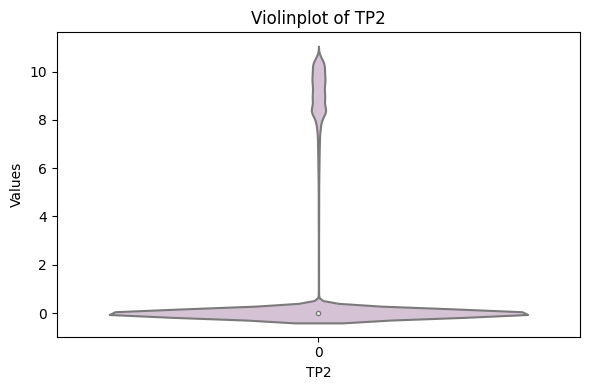

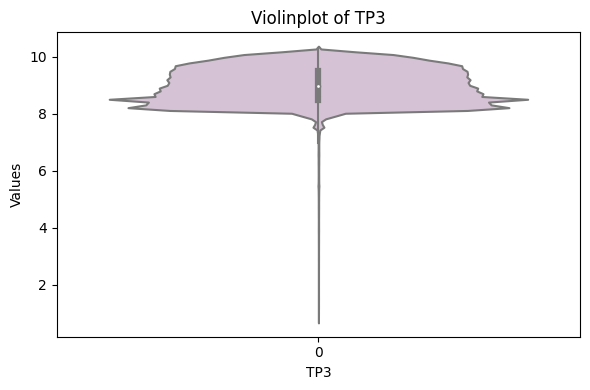

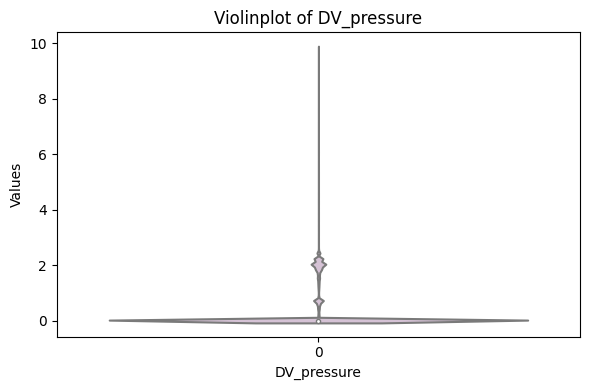

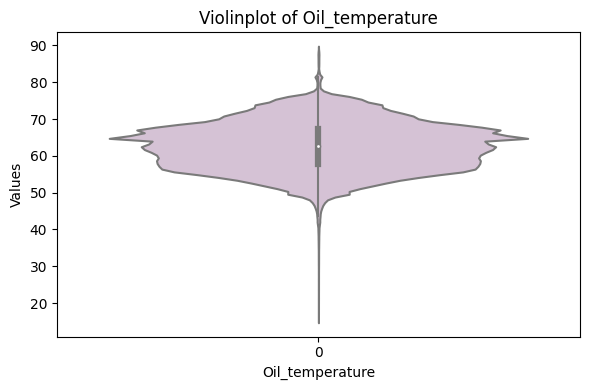

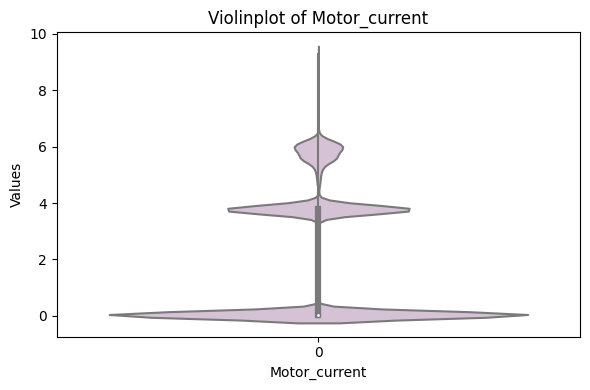

In [ ]:
# Plotting Violin plot for numerical columns
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(df[col],color='thistle')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.title(f'Violinplot of {col}')
    plt.tight_layout()

**Insights from Violin Plots for Numerical columns :**
- **TP2**: TP2 primarily falls within the 0 to 1 range, with occasional spikes between 8 to 11, indicating two distinct operating modes - low throttle positions and intermittent higher values.

- **TP3:** TP3 remains stable, with 99% of data between 7 to 10, suggesting a consistent throttle position and specific operational mode.

- **H1:** H1 exhibits two modes - one in the low-pressure range and another around 8 to 9. The system frequently operates within the latter range, with occasional lower pressure conditions.

- **DV Pressure:** DV Pressure primarily operates at low values (0), with rare occurrences around 2, indicating a predominantly low-pressure system.

- **Reservoirs:** Reservoir levels are stable, with around 99% of data between 7 to 10, mirroring the median at 8 to 9.

- **Oil Temperature:** Oil temperature varies between 40 to 80, with a median around 65, indicating a typical operational range.

- **Motor Current:** Motor Current is right-skewed, concentrated at low levels, with occasional spikes around 4 and 6, suggesting occational fluctuations.


### **Time-Series Analysis**

In [ ]:
# Convert 'timestamp' column to datetime format for time-series analysis
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
# Extract time components-'date' for daily analysis
df['Date'] = df['timestamp'].dt.date
# Extract year, month, day, hour, minute, and second
df['Year'] = df['timestamp'].dt.year
df['Month'] = df['timestamp'].dt.month
df['Day'] = df['timestamp'].dt.day
df['Hour'] = df['timestamp'].dt.hour
df['Minute'] = df['timestamp'].dt.minute
df['Second'] = df['timestamp'].dt.second

df.head(3)

timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   

   Oil_temperature  Motor_current  COMP  DV_eletric  ...  Pressure_switch  \
0           53.600         0.0400   1.0         0.0  ...              1.0   
1           53.675         0.0400   1.0         0.0  ...              1.0   
2           53.600         0.0425   1.0         0.0  ...              1.0   

   Oil_level  Caudal_impulses        Date  Year  Month Day  Hour  Minute  \
0        1.0              1.0  2020-02-01  2020      2   1     0       0   
1        1.0              1.0  2020-02-01  2020      2   1     0       0   
2        1.0              1.0  2020-02-01  2020      2   1     0       0   

   Second  
0       0  
1      10  
2      19  

[3 rows x 23 columns]

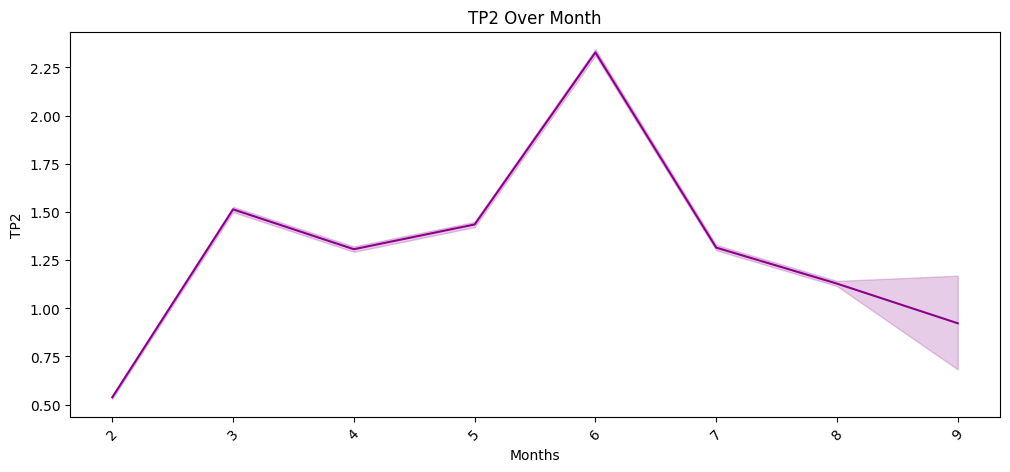

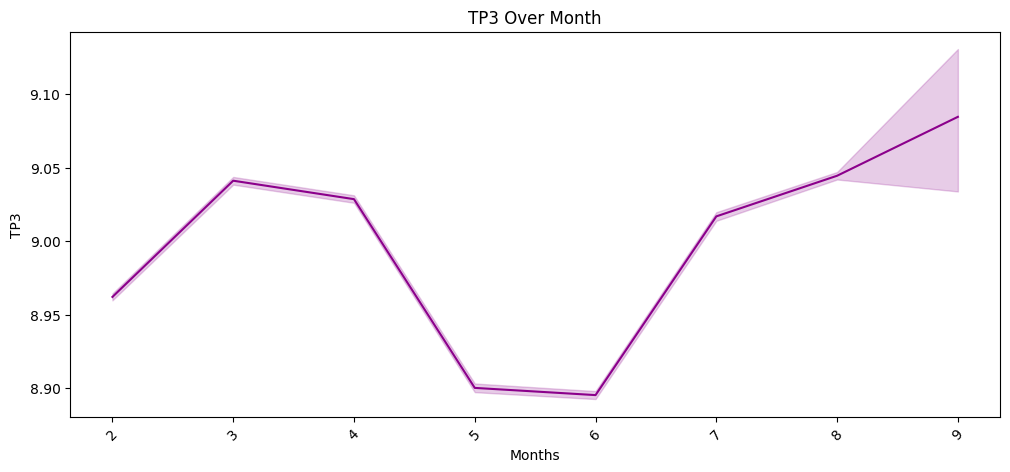

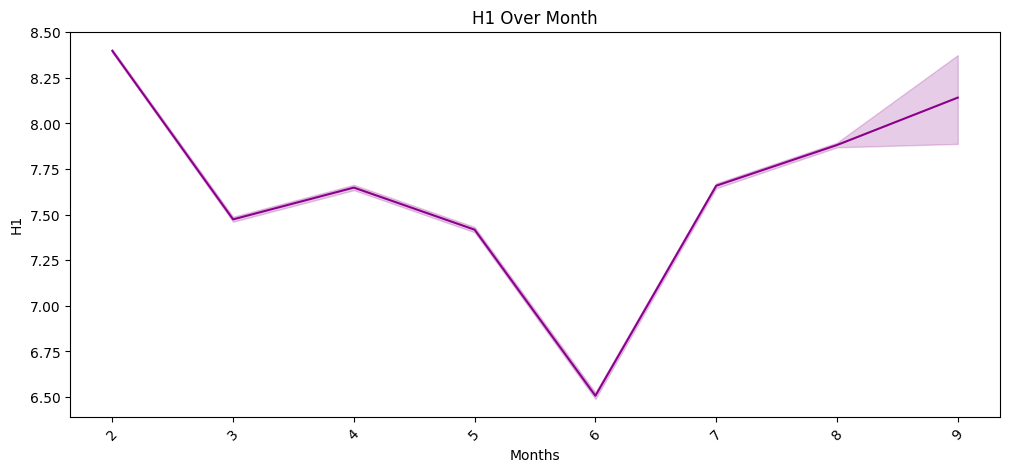

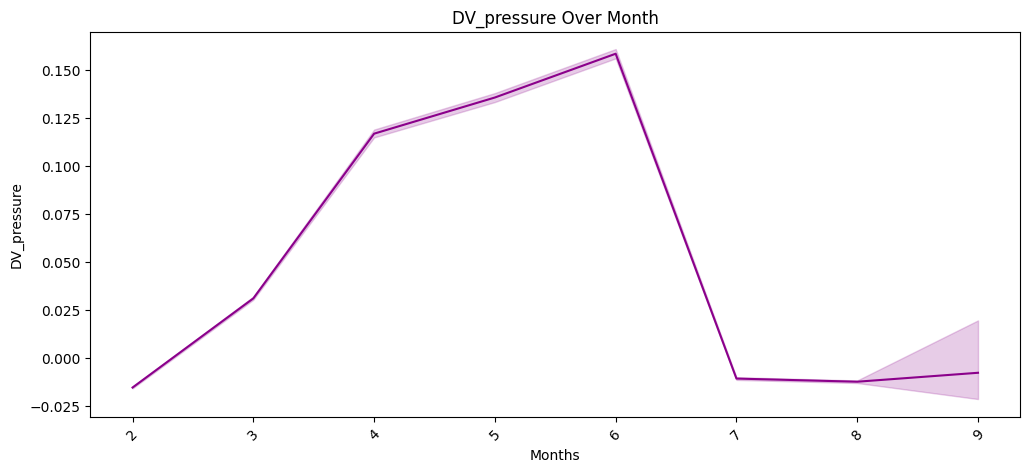

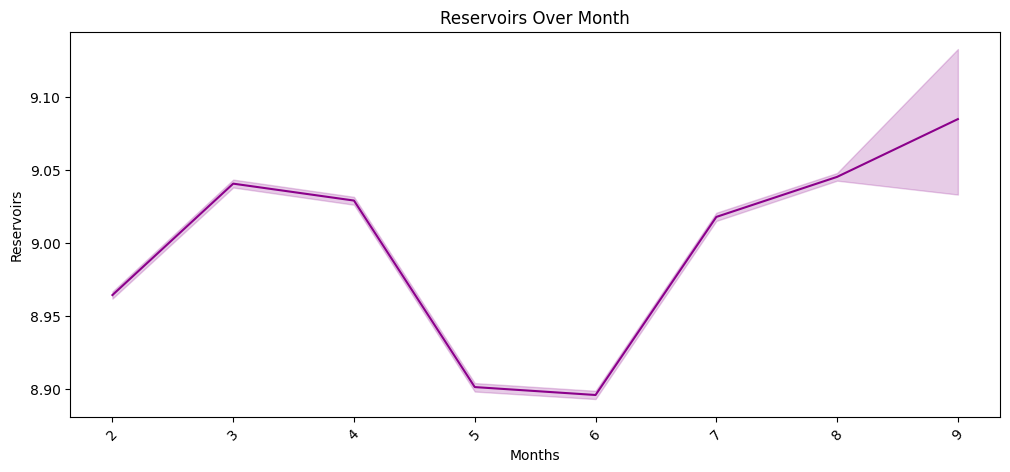

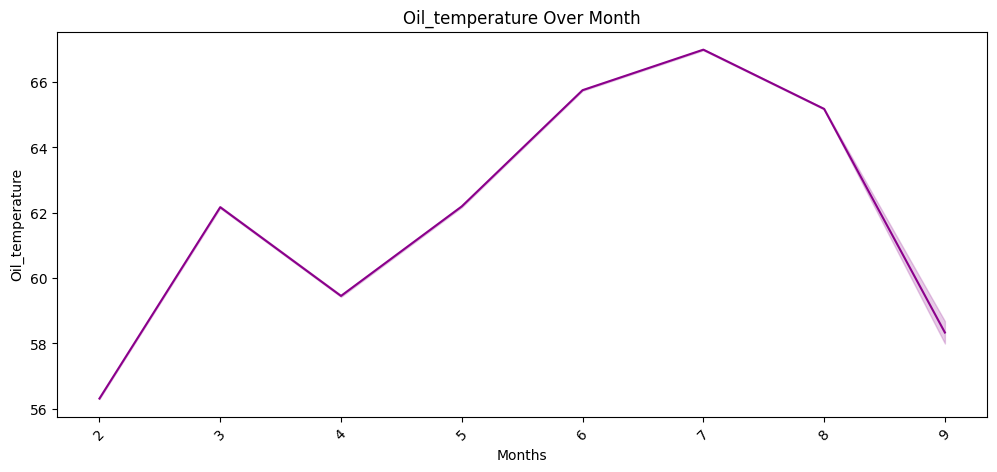

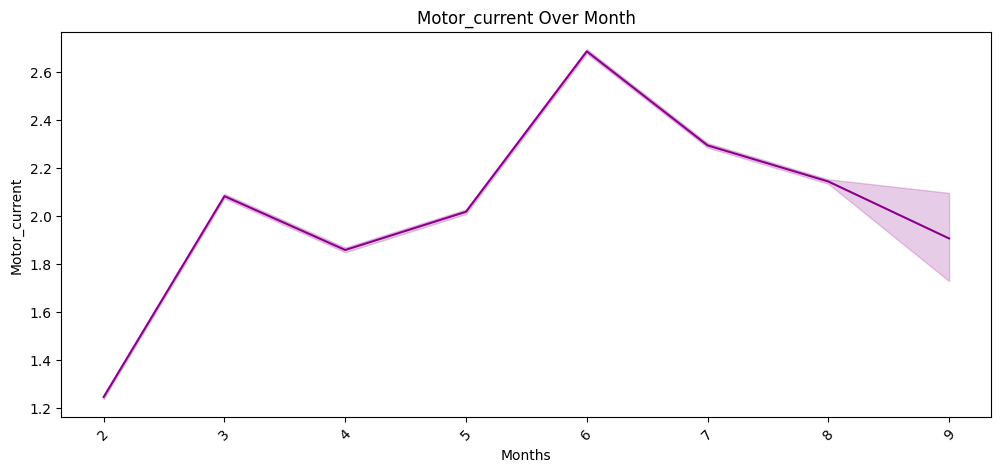

In [ ]:
# Line plot of the numeric columns over month
for col in num_cols:
    plt.figure(figsize=(12,5))
    sns.lineplot(x='Month', y=col, data=df,color = 'darkmagenta')
    plt.title(f'{col} Over Month')
    plt.xlabel('Months')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

**Insights from the line plot of numerical columns over each month :**
- **TP2:**
TP2 displays an increase in February, followed by a gradual decrease from March to April. There's a slight increase in April, with a sharp rise in May, reaching its highest value by month-end. From there, it gradually decreases for the remaining months.

- **TP3:**
TP3 experiences an increase in February, followed by a slight decrease in March. There's a notable drop in April, reaching its lowest point in May. Starting from June, it shows a continuous monotonic increase.

- **H1:**
H1 exhibits a sharp decrease in February, followed by a slight increase in March. April sees a sudden drop, reaching its lowest point at the end of May. From there, it experiences a sharp monotonic increase for the subsequent months.

- **DV Pressure Over the Months:**
DV Pressure monotonically increases from February until the end of May. There's a sudden drop in June, reaching its lowest value, and thereafter, it remains nearly constant for the subsequent months.

- **Reservoirs Over the Months:**
Reservoir levels increase in February, followed by a slight decrease in March. April experiences a sudden drop, reaching its lowest point in May. Starting from June onwards, reservoir levels display a continuous monotonic increase.

- **Oil Temperature Over the Months:**
Oil temperature shows a linear increase during February and then decreases in March. It gradually increases until the end of June, reaching its maximum value. Afterward, it gradually decreases during the following months.

- **Motor Current Over the Months:**
Motor Current follows a similar pattern, with a linear increase in February, followed by a decrease in March. It gradually increases until the end of June, reaching its maximum value.It gradually decreases during the subsequent months.


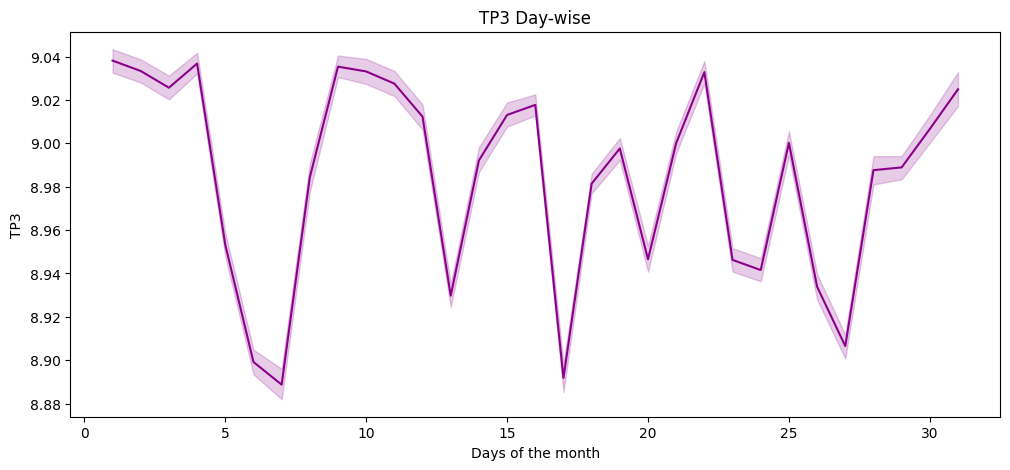

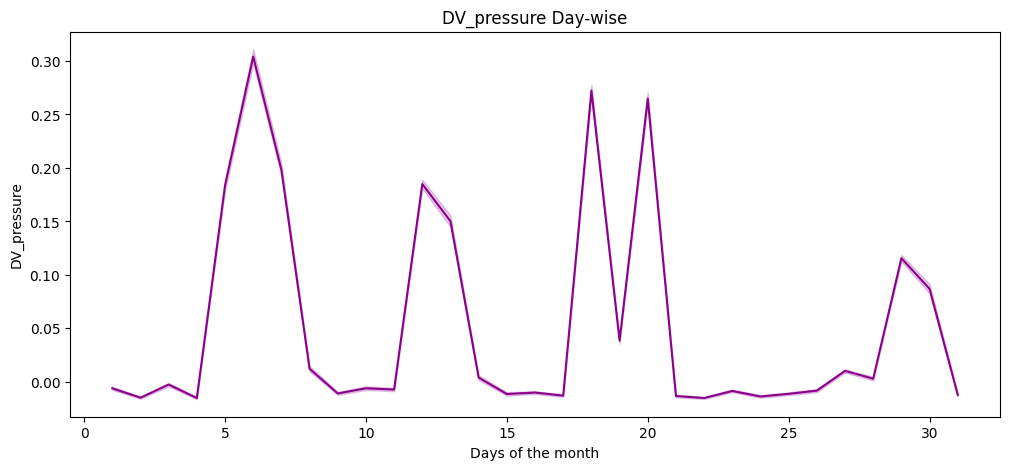

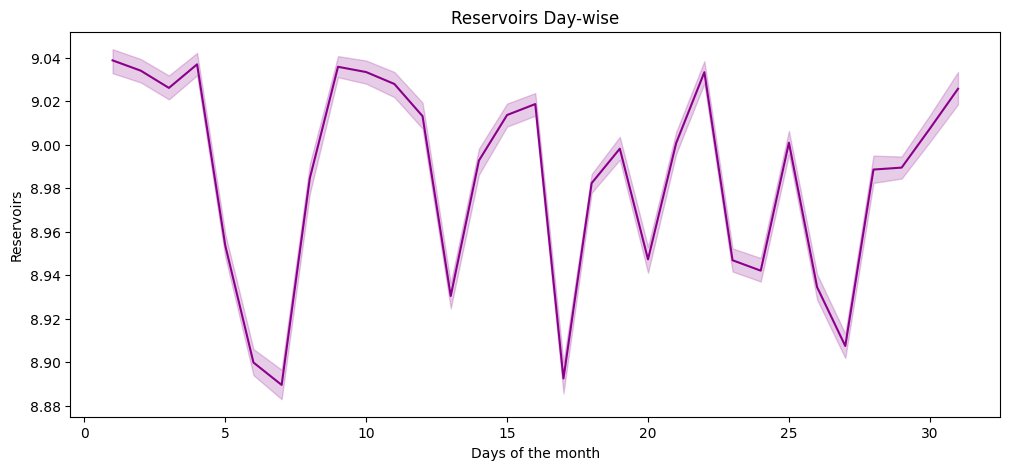

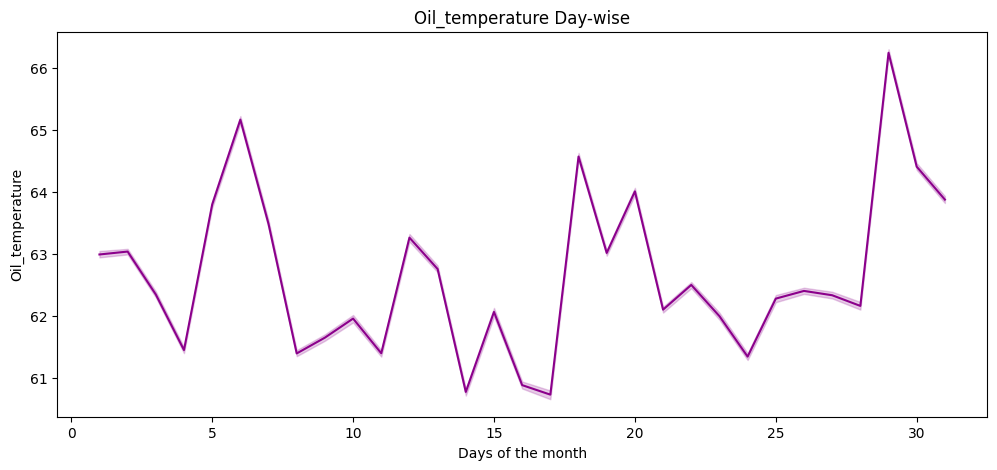

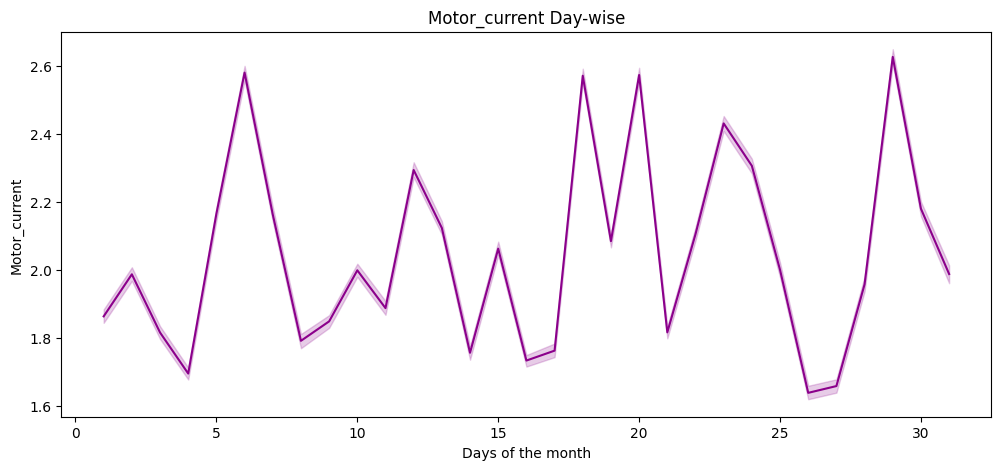

In [ ]:
# Line plot of the numeric column over days
for col in num_cols:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Day', y=col, data=df, color= 'darkmagenta')
    plt.title(f'{col} Day-wise')
    plt.xlabel('Days of the month')
    plt.ylabel(col)
    plt.show()

**Insights from the line plot of numerical columns over days of each month :**
- **TP2 Across Days of the Month:**
TP2 exhibits a cyclic pattern, consistently reaching its maximum peak every 6 days within each month.

- **TP3 Across Days of the Month:**
TP3 shows a semi-cyclic pattern, with minimum values occurring approximately every 6 days. However, some fluctuations are present.

- **H1 Across Days of the Month:**
H1 displays a cyclic pattern characterised by a sharp drop every 6 days of the month. Similar to TP3, there are also some fluctuations.

- **DV Pressure Across Days of the Month:**
DV Pressure demonstrates an interesting pattern. It increases on every 7th day of the first week, experiences sharp fluctuations in the 3rd week, possibly due to malfunction, and tends to reach minimal values in the last week of the month.

- **Reservoirs Across Days of the Month:**
Reservoir levels follow a semi-cyclic pattern, reaching their minimum in approx. every 6 days. However, like TP3, there are some accompanying fluctuations.

- **Oil Temperature Across Days of the Month:**
Oil temperature exhibits a fluctuating trend, with values increasing in the first week and fluctuating until the end of the month. There's a notable sharp rise towards the end of the month.

- **Motor Current Across Days of the Month:**
Motor Current reaches its highest value at the beginning of the month and its lowest value in the last week. There are fluctuations in between, reflecting dynamic behavior over the course of the month.


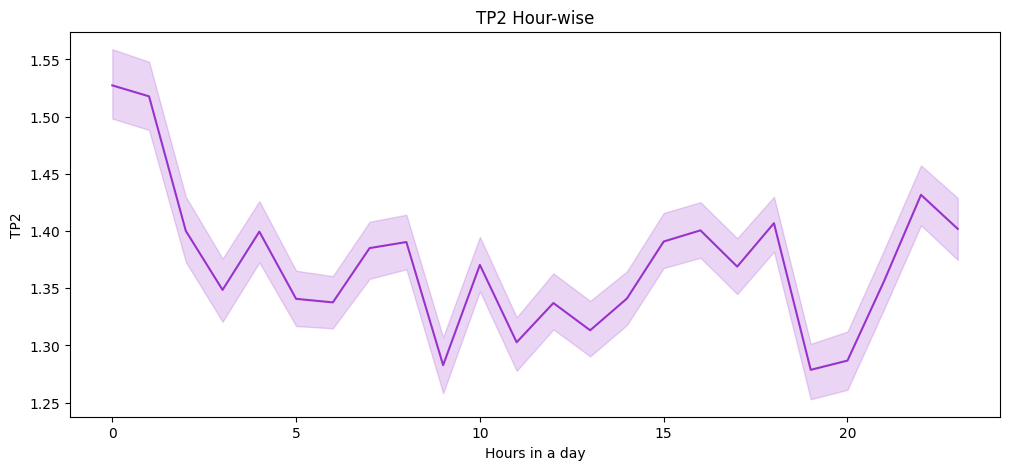

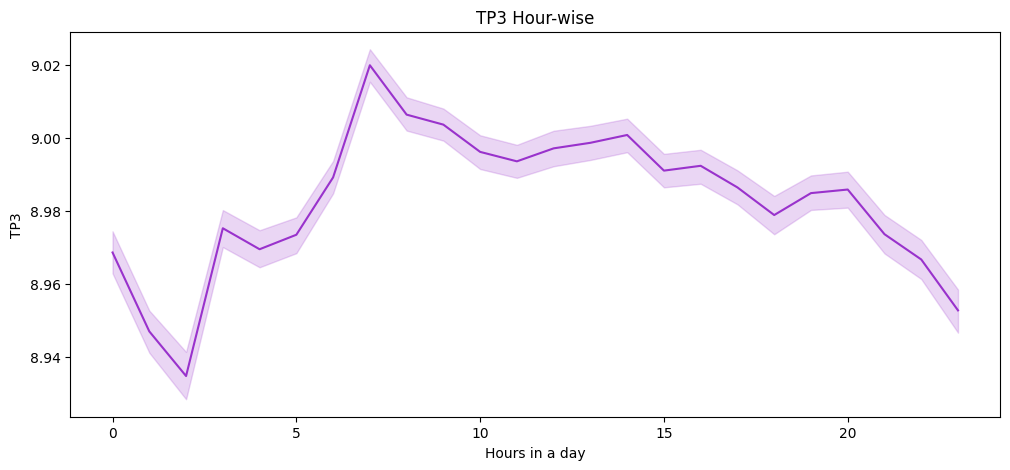

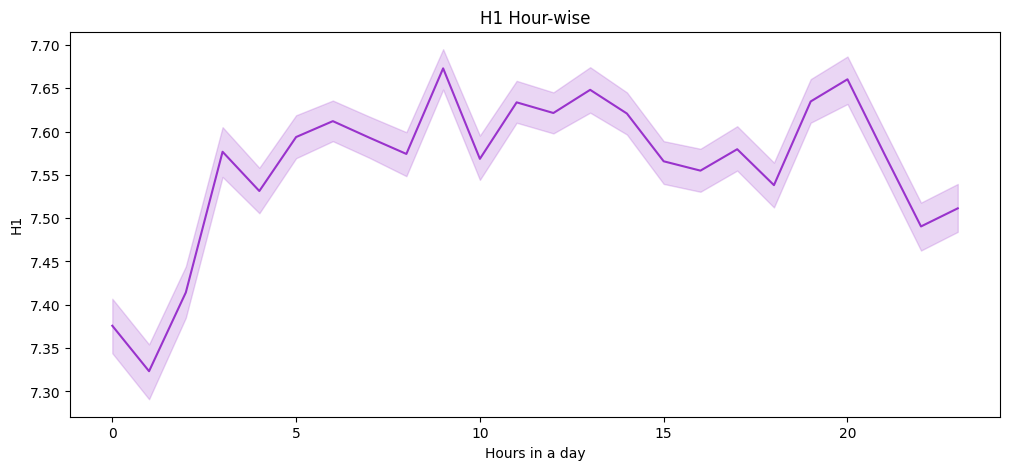

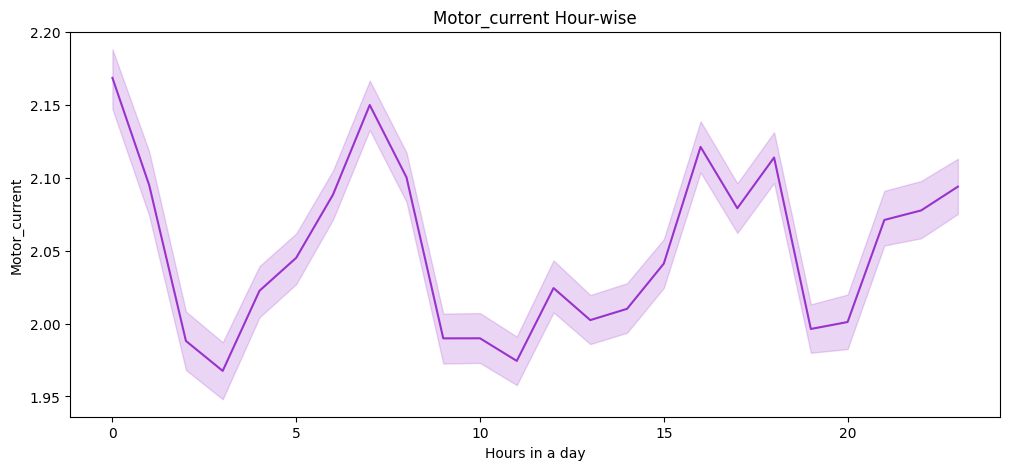

In [ ]:
# Line plot of the numeric column over hours
for col in num_cols:
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Hour', y=col, data=df,color='darkorchid')
    plt.title(f'{col} Hour-wise')
    plt.xlabel('Hours in a day')
    plt.ylabel(col)
    plt.show()

**Insights from the line plot of numerical columns over hours within a day :**

- **TP2 Across Hours of the Day:**
TP2 follows a repeating pattern every 5-6 days. At the end of each cycle, the last day hits its highest TP2 value, which is around 2.2.

- **TP3 Across Hours of the Day:**
TP3 values constantly change, going up and down throughout the day. The highest values are typically observed during the early hours of the day.

- **H1 Across Hours of the Day:**
Similar to TP2, H1 displays a cyclic pattern every 5-6 days. However, the last day of each cycle usually has the lowest H1 value.

- **DV Pressure Across Hours of the Day:**
DV Pressure remains relatively constant around -0.01 to 0 for most of the day. A cyclic pattern is noticeable, with the last hour of each cycle experiencing the highest pressure.

- **Reservoir Across Hours of the Day:**
Reservoir levels vary significantly throughout the day, with multiple peaks and lows. The column displays a dynamic pattern.

- **Oil Temperature Across Hours of the Day:**
Oil temperature steadily rises and falls during the day. The highest oil temperature is typically observed towards the end of the month.

- **Motor Current Across Hours of the Day:**
Motor current exhibits a consistent zig-zag pattern, constantly going up and down. The highest current values are typically observed at the beginning and end of each month.


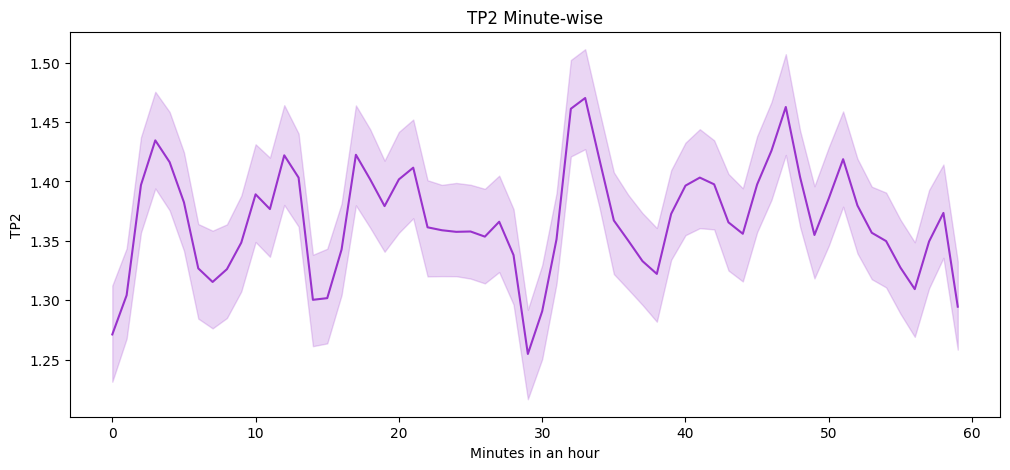

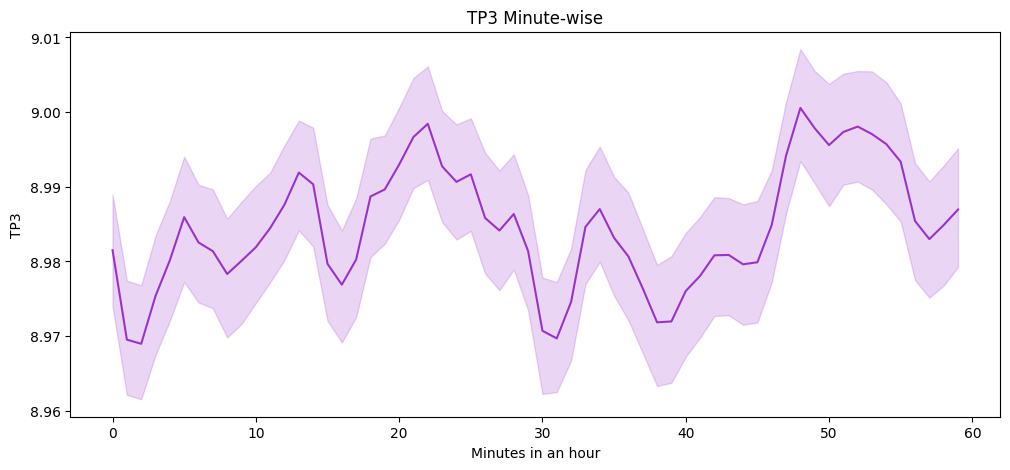

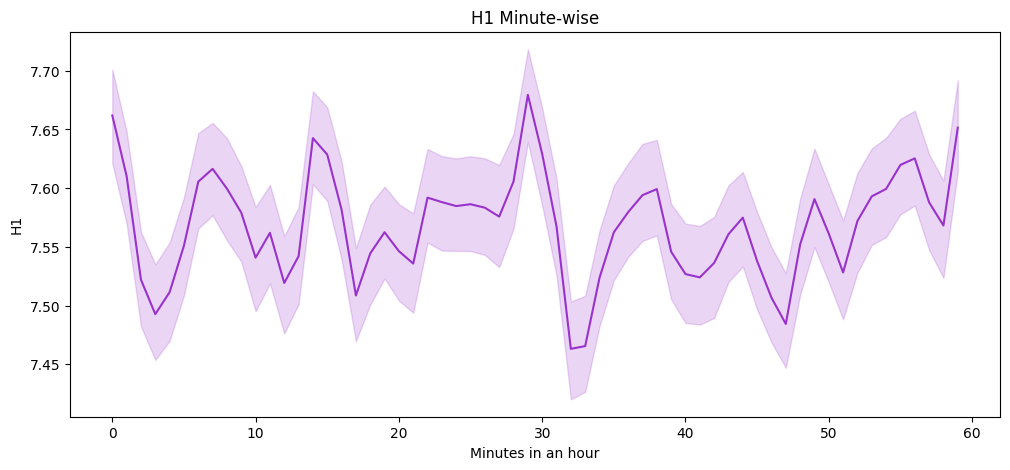

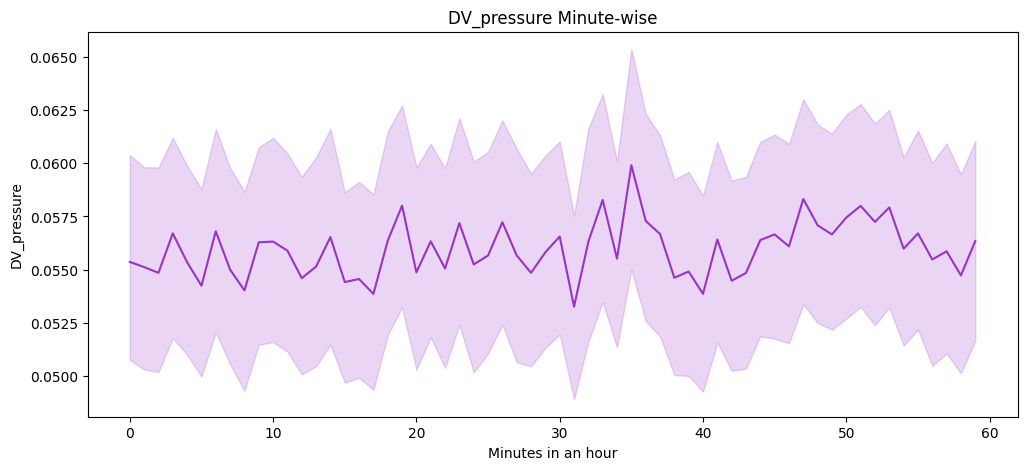

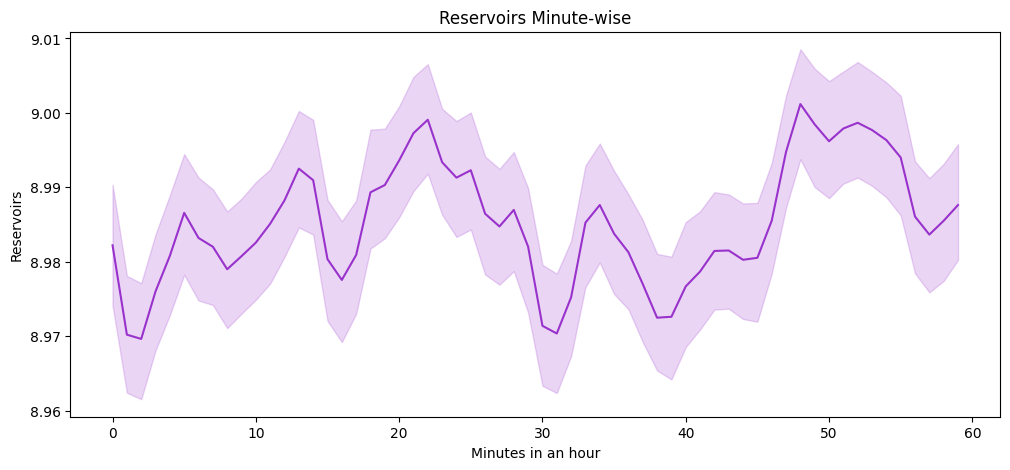

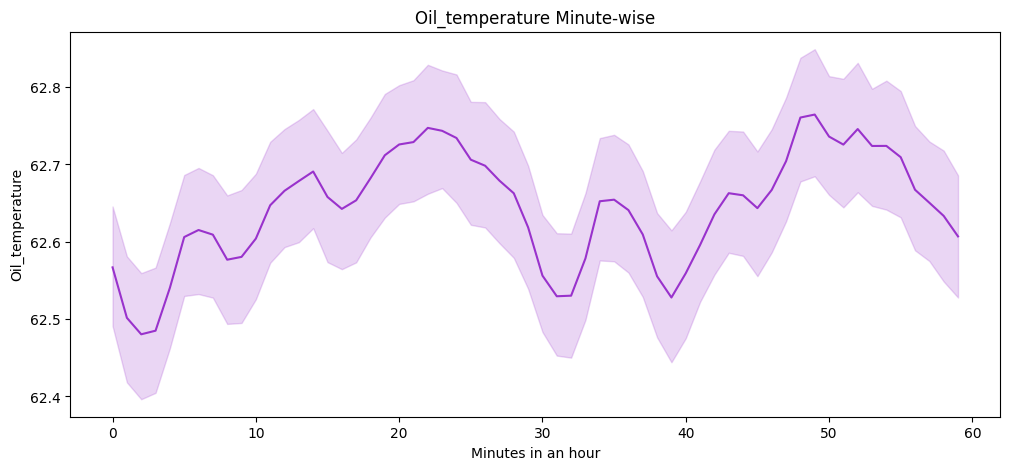

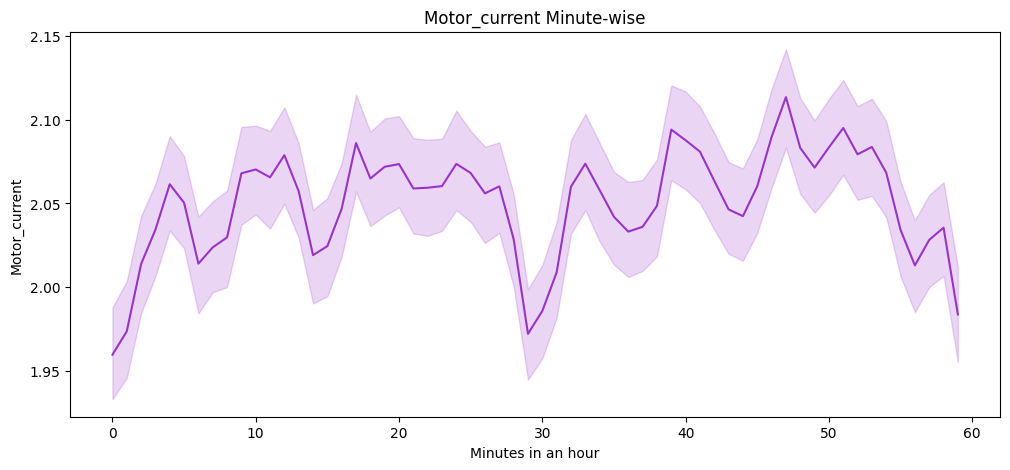

In [ ]:
for col in num_cols :
    # Line plot of the numeric column over minutes
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Minute', y=col, data=df, color='darkorchid')
    plt.title(f'{col} Minute-wise')
    plt.xlabel('Minutes in an hour')
    plt.ylabel(col)
    plt.show()

**Insights from the line plot of numerical columns over minutes within an hour :**
- **TP2 Across Minutes per Hour:**
TP2 reaches its highest value at the beginning of each hour. As the hour progresses, TP2 mostly remains within the range of 1.33 to 1.38.

- **TP3 Across Minutes per Hour:**
TP3 initially decreases, then steadily increases, peaking at 7 minutes into the hour, after which it gradually falls.

- **H1 Across Minutes per Hour:**
H1 starts with a decrease, then steadily increases, remaining mostly within the range of 7.55 to 7.65.

- **DV Pressure Across Minutes per Hour:**
DV Pressure continuously decreases until six minutes into the hour, followed by a zig-zag trend with a slight increase towards the end.

- **Reservoir Across Minutes per Hour:**
Initially, reservoir levels decrease, reach a peak at 7 minutes into the hour, and then steadily decline.

- **Oil Temperature Across Minutes per Hour:**
Oil temperature decreases initially, peaks at 7 minutes into the hour, and then gradually falls.

- **Motor Current Across Minutes per Hour:**
Motor current constantly decreases throughout the hour, exhibiting a downward trend.


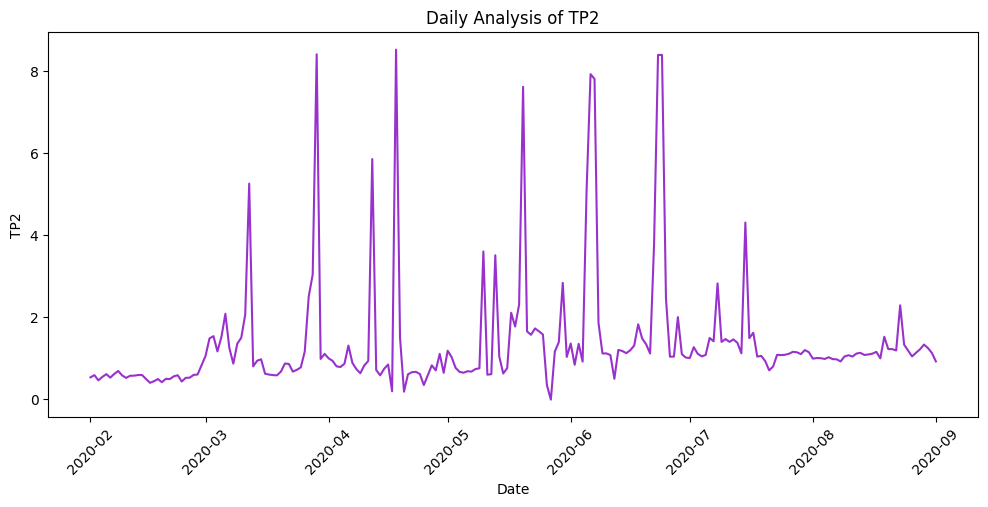

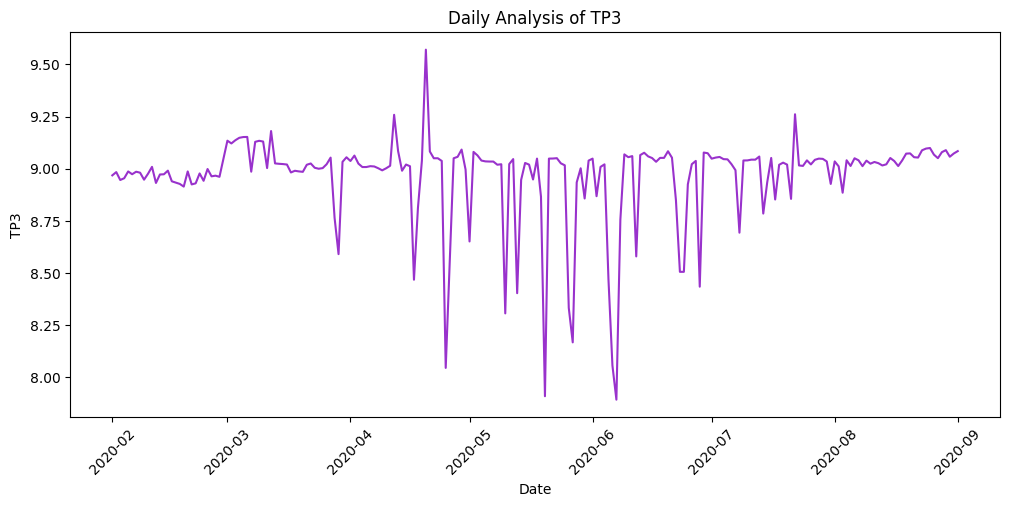

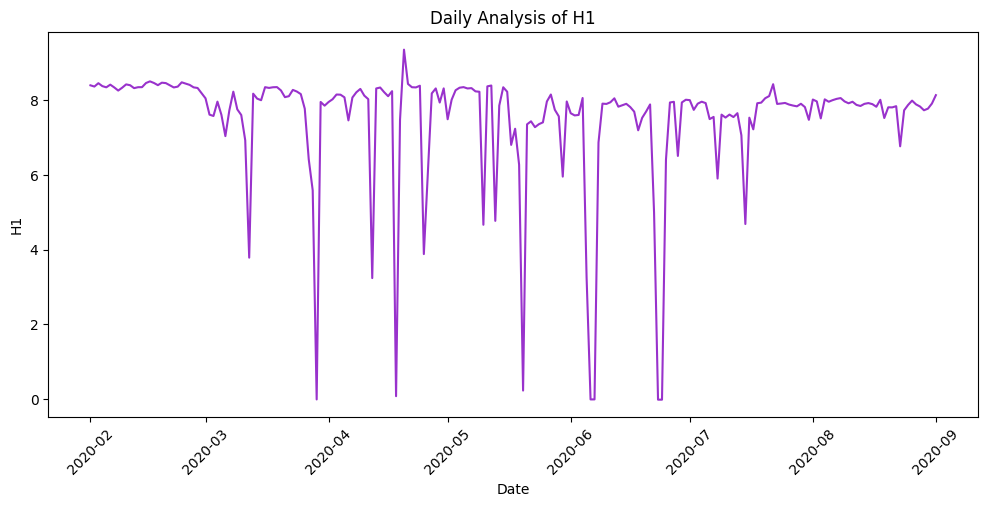

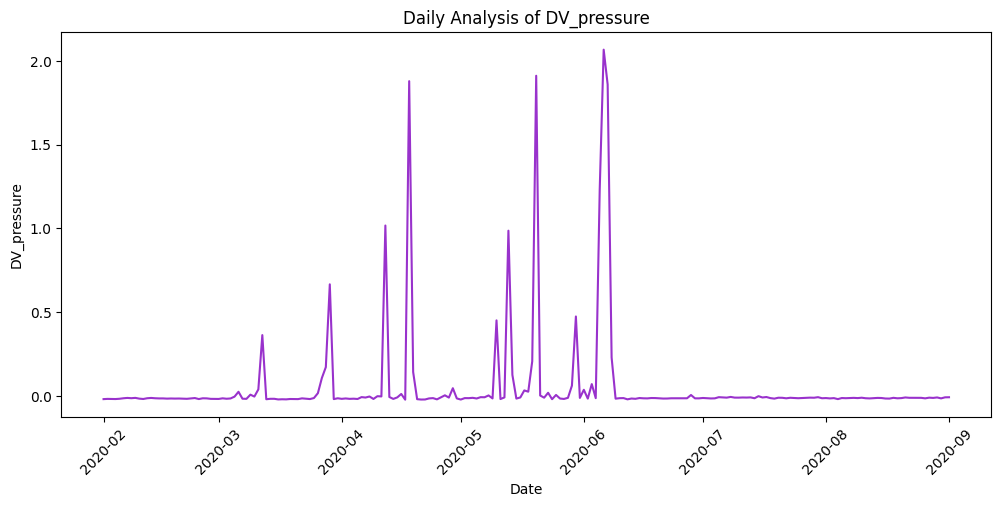

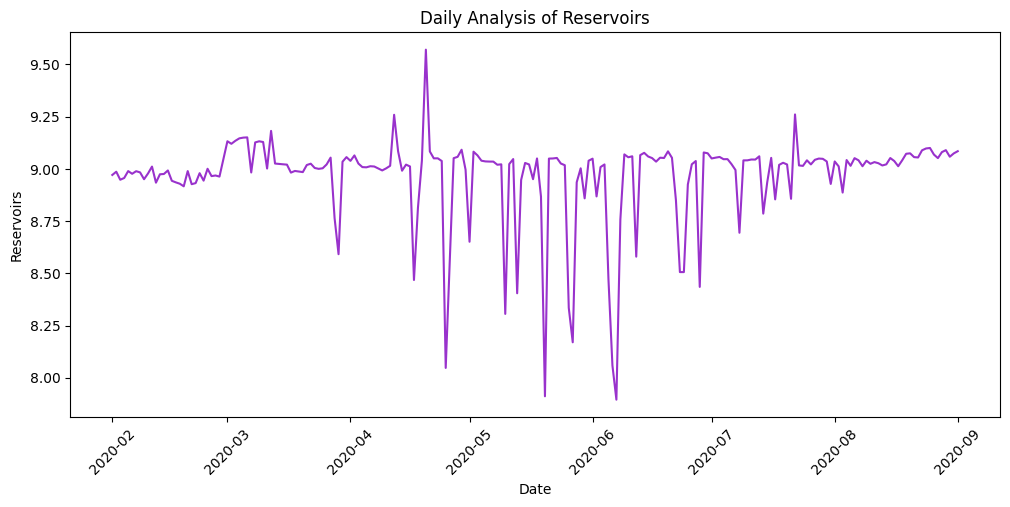

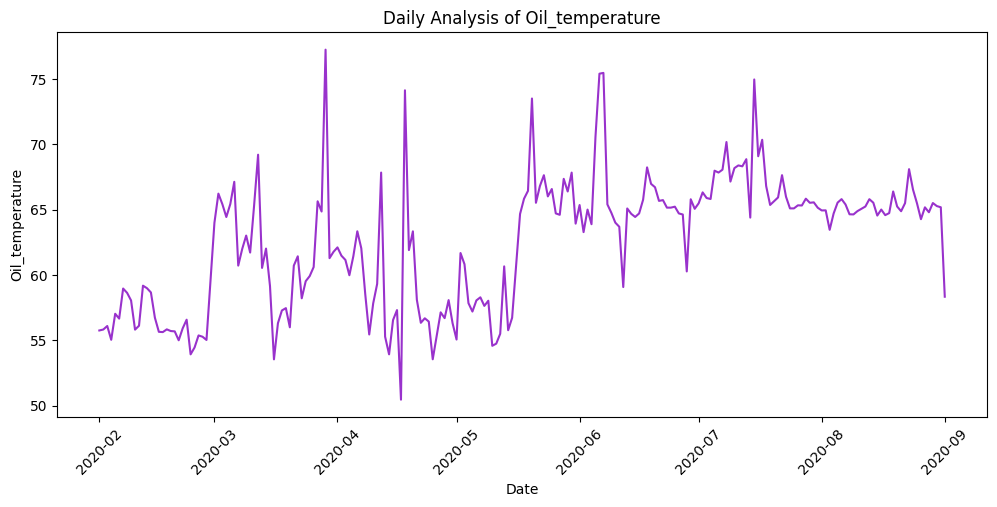

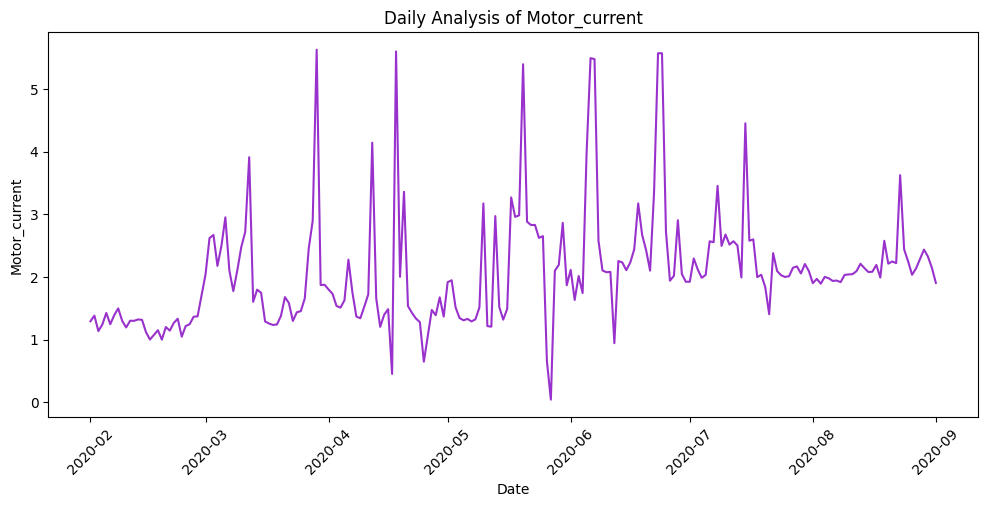

In [ ]:
# Line plot of the numeric column on daily basis
for col in num_cols:
    # Group data by date and calculate the mean for the numerical column
    daily_data = df.groupby('Date')[col].mean().reset_index()
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='Date', y=col, data=daily_data, color='darkorchid')
    plt.title(f'Daily Analysis of {col}')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

**Insights from the lineplot for numerical columns over each date:**
- **TP2 Daily Analysis:**
TP2 remains relatively constant for most of the time but reaches its maximum value once a month.

- **TP3 Daily Analysis:**
TP3 shows overall stability, except between April and June when it reaches its minimum value multiple times during those months.

- **H1 Daily Analysis:**
Similar to TP3, H1 maintains stability for most of the time but experiences multiple occurrences of reaching its minimum value between April and July.

- **DV Pressure Daily Analysis:**
DV Pressure hovers around zero for the majority of the year but occasionally increases for a few days. Between March and June, there are instances of sudden increases, followed by drops the next day.

- **Reservoir Daily Analysis:**
Reservoir performance resembles TP3 and H1, with overall stability but several instances of reaching its minimum value between April and July.

- **Oil Temperature Daily Analysis:**
Oil temperature exhibits a continuous zig-zag pattern, constantly increasing and decreasing over the observed period.

- **Motor Current Daily Analysis:**
Motor current follows a pattern similar to oil temperature, with a complete zig-zag pattern. Most values fall within the range of 1 to 2.



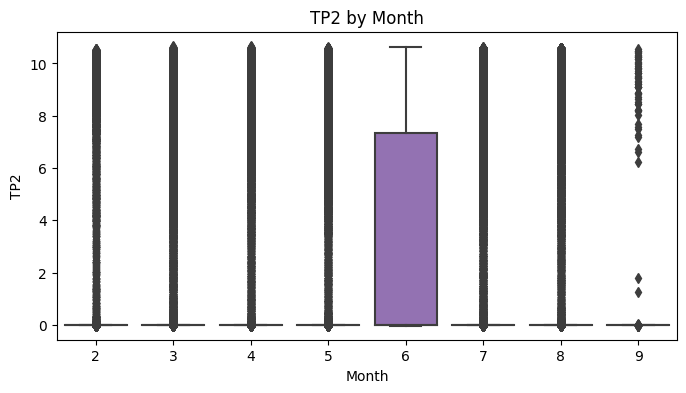

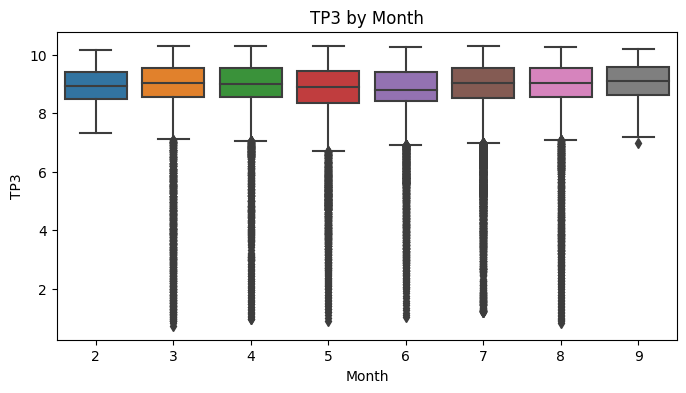

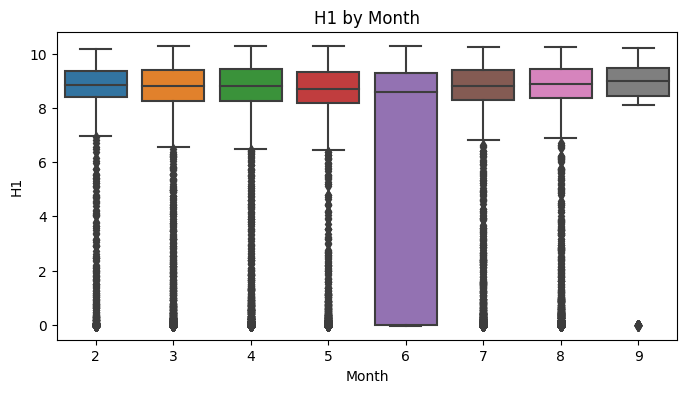

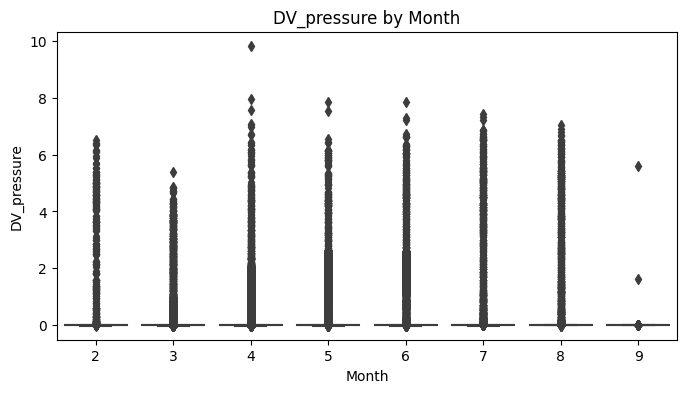

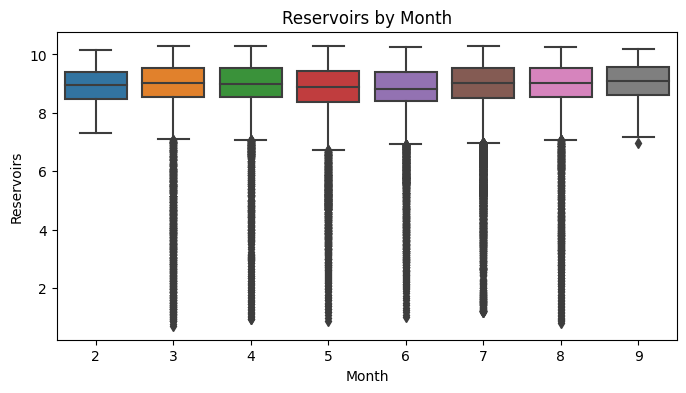

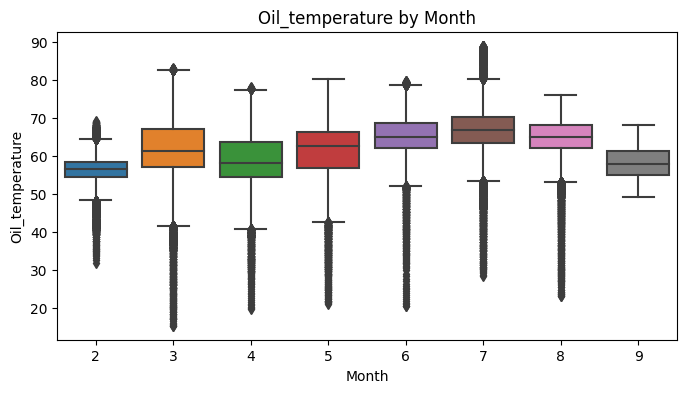

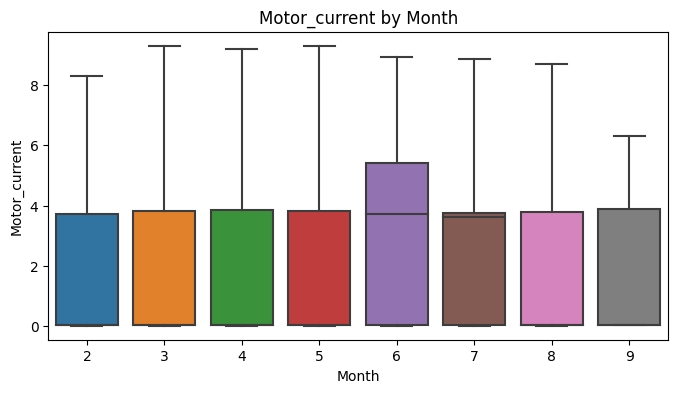

In [ ]:
# Boxplot of the numeric column by Month
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Month', y=col, data=df)
    plt.title(f'{col} by Month')
    plt.xlabel('Month')
    plt.ylabel(col)
    plt.show()

**Insights from the box plot for numerical columns over months:**
- **TP2 Month-Wise Box Plots:**
The boxplot for TP2 shows a very large range in the month of June and is right-skewed, with no outliers compared to the remaining months, which have a much smaller range and lots of outliers.

- **TP3 Month-Wise Box Plots:**
Similar box plots can be observed for all the months, except for February and September, which don't have outliers like the other months. The median is approximately around 9.

- **H1 Month-Wise Box Plots:**
All the months exhibit similar types of box plots, except for June, which is left-tailed. However, the median of all the plots is more or less around 9.

- **DV Pressure Month-Wise Box Plots:**
The median of DV pressure is around zero for all months. The month of September doesn't have outliers like the rest of the months.

- **Reservoir Month-Wise Box Plots:**
All the box plots are similarly placed. The median for all the months is around 9, while February and September don't have outliers.

- **Oil Temperature Month-Wise Box Plots:**
Box plots for oil temperature are differently placed for each month. The median for all the months ranges from 56 to 65. All months have outliers, except for September.

- **Motor Current Month-Wise Box Plots:**
All the box plots are right-tailed. The median value for the box plots is around 3.8 for all months.


## **Regression Analysis:**

### T2. Identify and list regression problems on your assigned dataset. Which one does seem the most interesting to you and why?

Regression problems involve predicting a continuous numeric value based on input features. Given the attributes in the metro train dataset, here are a few potential regression problems:

1. **Predict Motor Current:** Given sensor readings such as 'TP2', 'TP3', 'H1', and 'Oil_temperature', predict the 'Motor_current' value, which represents the electrical current consumed by the motor. This could be valuable for monitoring motor health and efficiency.

2. **Oil Temperature Prediction:** Use attributes like 'TP2', 'TP3', 'H1', and 'Motor_current' to predict the 'Oil_temperature'. Accurate prediction of oil temperature is crucial for maintaining optimal compressor operation and preventing overheating.

3. **Air Pressure Prediction:** Given sensor readings like 'TP2', 'TP3', 'H1', and 'Oil_temperature', predict the 'DV_pressure' or other pressure-related attributes. Accurate pressure prediction is essential for maintaining safe and efficient compressor operation.

4. **Estimating Reservoir Levels ('Reservoirs'):** Predict the levels of the 'Reservoirs' using other attributes. This could help in maintaining appropriate fluid levels and preventing issues due to under- or overfilling.



**Selecting the Most Interesting Problem:**

Choosing the most interesting problem depends on goals, domain expertise, and the potential impact of solving the problem. However, one problem that stands out is predicting the 'Motor_current'. Motor current consumption is a crucial indicator of the motor's health, efficiency, and potential issues. By accurately predicting motor current, you could:

- Identify abnormal motor behavior or impending failures.
- Optimize energy consumption by understanding how motor current changes in different operating conditions.
- Schedule maintenance more effectively, preventing unexpected breakdowns.
- Enhance passenger safety by addressing potential motor-related risks.
- Solving this problem would likely have a direct impact on the overall reliability, efficiency, and safety of the metro train system.

**Reasons for Choosing this Problem:**
1. **Maintenance Planning:** The prediction of motor current offers valuable insights for maintenance planning. By identifying abnormal current patterns, maintenance actions can be scheduled proactively, reducing the risk of unexpected breakdowns and minimizing operational disruptions.

2. **Data Availability:** Motor current data is often readily available in such systems, making it a practical choice for predictive modeling.This availability ensures that sufficient data can be collected for accurate predictions.

3. **Real-time Monitoring:** Accurate motor current predictions can support real-time monitoring, allowing for immediate responses to any deviations from expected current levels.

### T3. Build an end-to-end Machine Learning pipeline for your assigned dataset for the aforementioned most interesting regression problems found in T2.


Your pipeline should
include components for dataset preprocessing, transformation, regression model building
hyperparameter tuning, grid search or optimization, and evaluation. Report results on the
regression models with hyperparameter tuning, and report the best hyperparameter
values. Report results using at least two relevant evaluation metrics like RMSE,MAE.
Compare results for different models and give the reasoning for that.

### **Dataset Preprocessing**
prepare the data for modeling

Major steps for preprocessing are :

**1. Handle Missing Values:** Checking for missing values and use appropriate measures to clean them.\
Already done in Task-01.No missing values are present in the dataset.

**2. Feature Selection:** Decide which features (attributes) to include as input (X) for predicting 'Motor_current'.

**3. Train-Test Split:** Split the data into training and testing sets to evaluate the model's performance.

**4. Scaling/Normalization:** Scale or normalize the features to ensure they are on a similar scale.

--> **Feature selection using correlation analysis**

In [ ]:
df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses', 'Date',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object')

In [ ]:
new_df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],axis=1)

In [ ]:
new_df.head()

timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   

   Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0           53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1           53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2           53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3           53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4           53.475         0.0400   1.0         0.0     1.0  1.0  0.0   

   Pressure_switch  Oil_level  Caudal_impulses        Date  
0              1.0        1.0              1.0  2020-02-01  
1              1.0        1.0              1.0  2020-02-01  
2              1.0        1.0              1.0  2020-02-01  
3              1.0        1.0              1.0  2020-02-01  
4              1.0        1.0              1.0  2020-02-01

<ipython-input-34-9d79aa29580b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_df.corr()


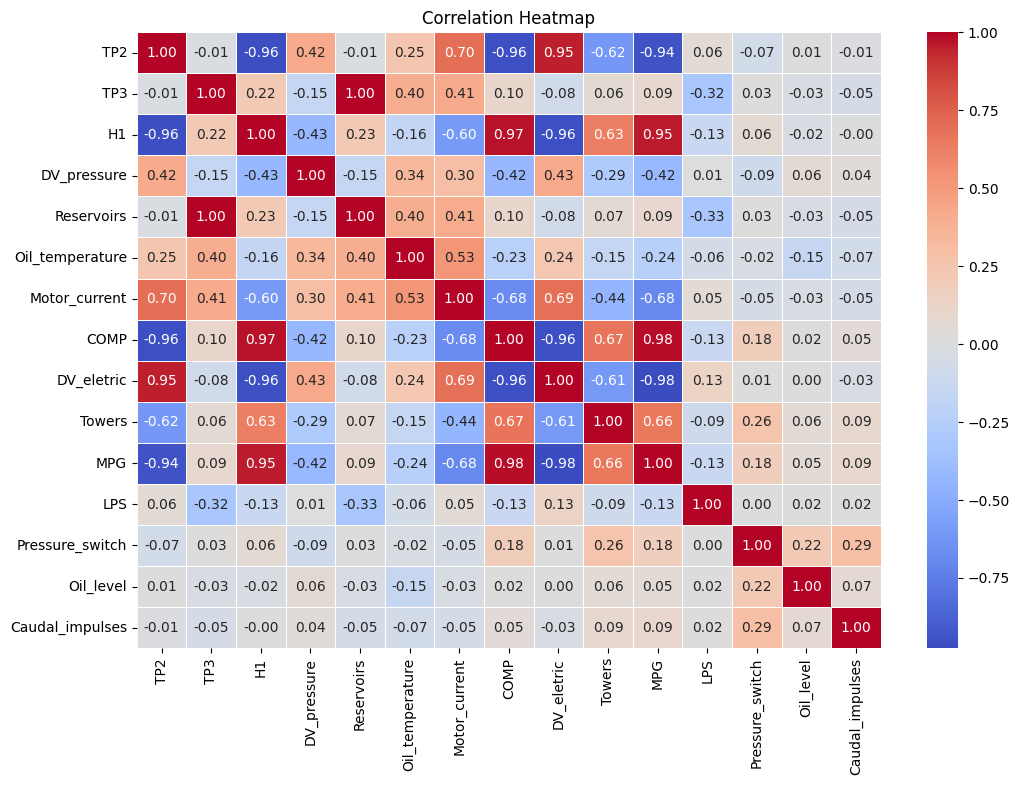

In [ ]:
# Feature Selection using Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
correlation_matrix = new_df.corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Checking the distributions for Motor current based on each encoded binary attribute to get some insights.**

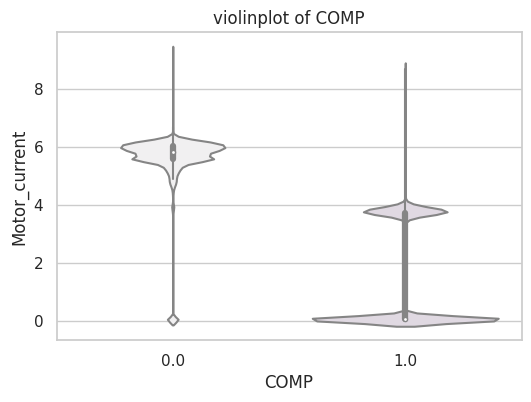

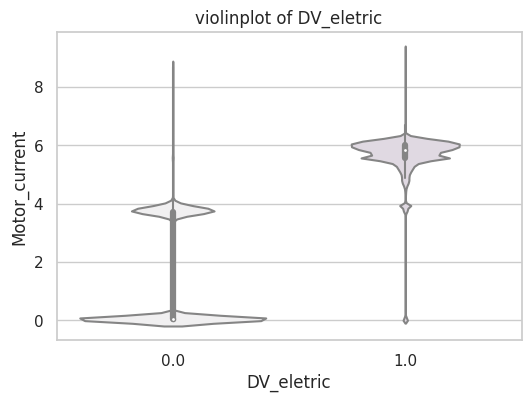

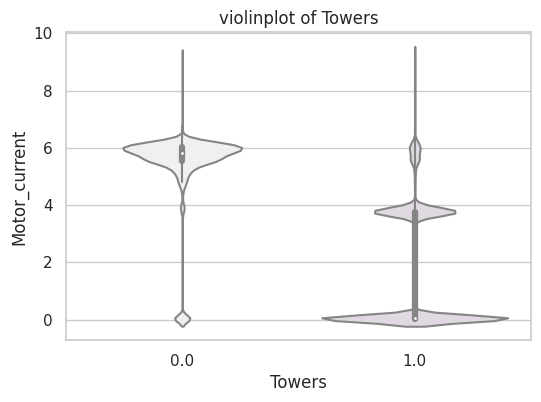

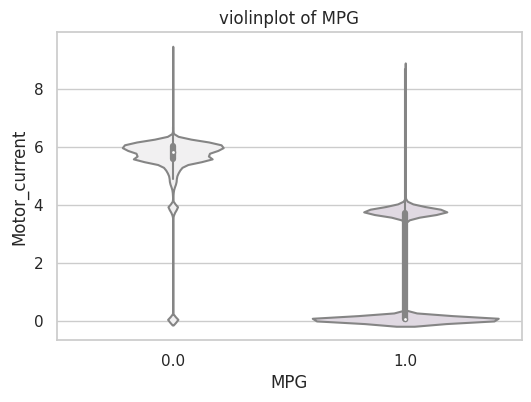

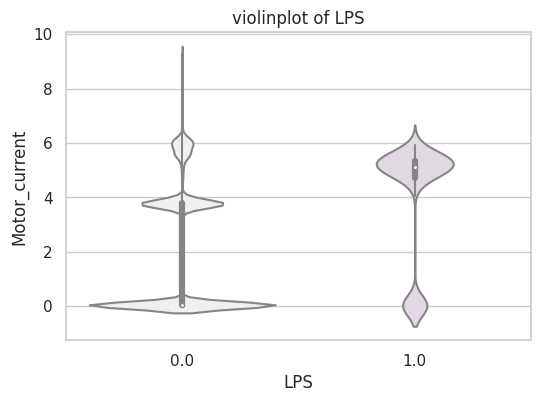

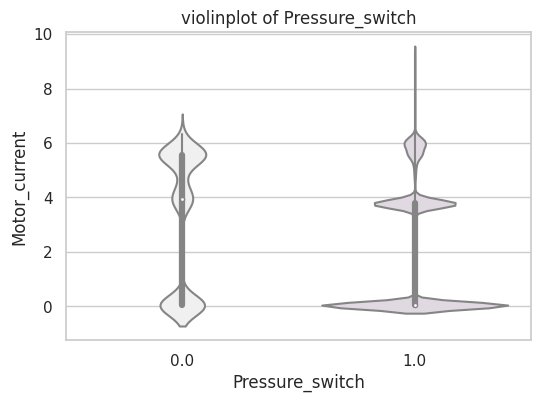

In [ ]:
# Set the style and context for the plots
sns.set_style("whitegrid")
sns.set_context("notebook")
# Plotting line plot for Motor current v/s encoded categorical columns
#Choosing motor current since target variable
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=col,y='Motor_current', data=df, palette=color)
    plt.title(f'violinplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Motor_current')
    plt.show()

**Insights for Violin plots for MOTOR CURRENT wrt Categorical Columns:**

- **COMP with Respect to Motor Current:**
  - For class 0 category: The median motor current is around 6, with the majority of data falling between 4 and 6. There are outliers near 0.
  - For class 1 category: The median motor current is near 0, and it closely resembles the distribution of motor current when plotted independently.

- **DV ELECTRIC with Respect to Motor Current:**
  - For class 0 category: The median motor current is near 0, matching the distribution of motor current when plotted independently.
  - For class 1 category: The median motor current is around 6, with most data between 4 and 6, and outliers near 0.

- **TOWERS with Respect to Motor Current:**
  - For class 0 category: The median motor current is around 6, and the majority of data falls between 4 and 6, with a few outliers near 0.
  - For class 1 category: The median motor current is near 0, and it resembles the distribution of motor current when plotted independently, with very few values around 6.

- **MPG with Respect to Motor Current:**
  - For class 0 category: The median motor current is around 6, with most data between 4 and 6 and outliers near 0.
  - For class 1 category: The median motor current is near 0, matching the distribution of motor current in the range of 0 to 4 when plotted independently.

- **LPS  with Respect to Motor Current:**
  - For class 0 category: The interquartile range spans from 0 to 5, with a median at 4 and almost equal concentration at the tails.
  - For class 1 category: The median motor current is near 0, resembling the distribution of motor current when plotted independently, with very few values around 6.

- **PRESSURE SWITCH with Respect to Motor Current:**
  - For class 0 category: The median motor current is around 0, and it closely matches the distribution of motor current when plotted independently.
  - For class 1 category: The interquartile range spans from 0 to 5, with a median near 0, similar to the independent motor current distribution.

- **OIL LEVEL with Respect to Motor Current:**
  - For class 0 category: The median motor current is near 4, and it matches the distribution of motor current when plotted independently.
  - For class 1 category: The median motor current is near 0, closely resembling the distribution of class 0 with more concentration near 0.

- **CAUDAL IMPULSES with Respect to Motor Current:**
  - For class 0 category: The median motor current is near 4, and it matches the distribution of motor current when plotted independently.
  - For class 1 category: The median motor current is near 0, closely resembling the distribution of class 0 with more concentration near 0.


In [ ]:
# Get correlations with 'Motor_current' (target variable)
correlations_with_target = correlation_matrix['Motor_current'].sort_values(ascending=False)

# Print correlations with 'Motor_current'
print("Correlations with Motor_current:")
print(correlations_with_target)

Correlations with Motor_current:
Motor_current      1.000000
TP2                0.697480
DV_eletric         0.689828
Oil_temperature    0.528739
TP3                0.413756
Reservoirs         0.412691
DV_pressure        0.302160
LPS                0.053664
Oil_level         -0.032793
Pressure_switch   -0.047003
Caudal_impulses   -0.051145
Towers            -0.439421
H1                -0.600178
COMP              -0.681326
MPG               -0.683543
Name: Motor_current, dtype: float64


Here are the attributes that seem to have a relatively strong correlation with 'Motor_current' (either positive or negative):

- 'TP2'
- 'DV_eletric'
- 'Oil_temperature'
- 'TP3'
- 'Reservoirs'
- 'DV_pressure'
- 'Towers'
- 'H1'
- 'COMP'
- 'MPG'

In [ ]:
# Selected features
predictors = ['TP2', 'DV_eletric', 'Oil_temperature', 'TP3', 'Reservoirs', 'DV_pressure','Caudal_impulses', 'Towers', 'H1', 'COMP', 'MPG']

In [ ]:
# Checking mutual correlation of the selected fratures
correlation_matrix = new_df[predictors].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Highly Correlated features:**
- Highly ***positive*** correlated features are TP3 AND Reservoir, TP2 and DV_electric and H1,COMP and MPG.
- Highly ***negative*** correlated features are TP2 with H1, COMP and MPG, and DV_electric with H1 COMP and MPG.

Need to remove any one of the features like :





In [ ]:
# Removing highly correlated features for prediction
highly_corr = ['Reservoirs','H1', 'COMP','DV_eletric']
filtered_predictors = [col for col in predictors if col not in highly_corr]
print(filtered_predictors)

['TP2', 'Oil_temperature', 'TP3', 'DV_pressure', 'Caudal_impulses', 'Towers', 'MPG']


**Train, Validation,Test Split (Random split)**

In [ ]:
# Data Preparation
X = df[filtered_predictors]
y = df['Motor_current']

In [ ]:
#splitting into train_test_validation sets
from sklearn.model_selection import train_test_split

X_train,X_rem,y_train,y_rem = train_test_split(X,y,test_size = 0.25,random_state = 50)
X_test,X_val,y_test,y_val = train_test_split(X_rem,y_rem,test_size = 0.6,random_state = 50)

print(X_train.shape,X_test.shape,X_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)

(1137711, 7) (151694, 7) (227543, 7)
(1137711,) (151694,) (227543,)


**Scaling / Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_scaled = scaler.transform(y_val.to_numpy().reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.to_numpy().reshape(-1, 1))

### **Model Building and Evaluation**

In [ ]:
# Importing Required Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Linear Regression**

In [ ]:
def model_fit_pred(model_reg,X_train,y_train,X_val,y_val,X_test,y_test):

    # fit model to the training data
    model = model_reg
    model.fit(X_train, y_train)

    # Prediction on train set
    y_train_pred =model.predict(X_train)
    # Prediction on validation set
    y_val_pred =model.predict(X_val)
    # Prediction on test set
    y_test_pred =model.predict(X_test)

    return y_train_pred, y_val_pred, y_test_pred

In [ ]:
def evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred):
  # Calculate performance metrics for train set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Calculate performance metrics for validation set
    validation_mse = mean_squared_error(y_val, y_val_pred)
    validation_rmse = mean_squared_error(y_val, y_val_pred, squared=False)
    validation_mae = mean_absolute_error(y_val, y_val_pred)
    validation_r2 = r2_score(y_val, y_val_pred)

    # Calculate performance metrics for test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)


    # Print the performance metrics
    print("Train Set Metrics:")
    print(f"RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R2-Score: {train_r2:.4f}")

    print("\nValidation Set Metrics:")
    print(f"RMSE: {validation_rmse:.4f}, MAE: {validation_mae:.4f}, R2-Score: {validation_r2:.4f}")

    print("\nTest Set Metrics:")
    print(f"RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R2-Score: {test_r2:.4f}")

    return train_rmse, train_mae, train_r2, validation_rmse, validation_mae, validation_r2, test_rmse, test_mae, test_r2

In [ ]:
#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(LinearRegression(),X_train,y_train,X_val,y_val,X_test,y_test)

# Model Performance
train_rmse_lr, train_mae_lr, train_r2_lr, validation_rmse_lr, validation_mae_lr, validation_r2_lr, test_rmse_lr, test_mae_lr, test_r2_lr = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 1.1886, MAE: 0.9652, R2-Score: 0.7335

Validation Set Metrics:
RMSE: 1.1884, MAE: 0.9658, R2-Score: 0.7334

Test Set Metrics:
RMSE: 1.1796, MAE: 0.9618, R2-Score: 0.7372


In [ ]:
#Predictions on scaled data
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(LinearRegression(),X_train_scaled,y_train_scaled,X_val_scaled,y_val_scaled,X_test_scaled,y_test_scaled)

# Model Performance on scaled data
train_rmse_lr_scaled, train_mae_lr_scaled, train_r2_lr_scaled, validation_rmse_lr_scaled, validation_mae_lr_scaled, validation_r2_lr_scaled, test_rmse_lr_scaled, test_mae_lr_scaled, test_r2_lr_scaled = evaluation(y_train_scaled,y_val_scaled,y_test_scaled,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 0.5162, MAE: 0.4192, R2-Score: 0.7335

Validation Set Metrics:
RMSE: 0.5162, MAE: 0.4195, R2-Score: 0.7334

Test Set Metrics:
RMSE: 0.5124, MAE: 0.4178, R2-Score: 0.7372


**Polynomial Regression**

In [ ]:
def poly_reg(X_train,y_train,X_val,y_val,X_test,y_test,degree):
     # Create PolynomialFeatures
    poly_features = PolynomialFeatures(degree=degree)

    # Transform the input features
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)
    X_test_poly = poly_features.transform(X_test)

    return X_train_poly, X_val_poly, X_test_poly

In [ ]:
#fitting polynomial features
X_train_poly, X_val_poly, X_test_poly = poly_reg(X_train,y_train,X_val,y_val,X_test,y_test,degree=2)

#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(LinearRegression(),X_train_poly,y_train, X_val_poly,y_val, X_test_poly,y_test)

# Model Performance
train_rmse_p, train_mae_p, train_r2_p, validation_rmse_p, validation_mae_p, validation_r2_p, test_rmse_p, test_mae_p, test_r2_p = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 0.9632, MAE: 0.7267, R2-Score: 0.8250

Validation Set Metrics:
RMSE: 0.9610, MAE: 0.7266, R2-Score: 0.8257

Test Set Metrics:
RMSE: 0.9618, MAE: 0.7262, R2-Score: 0.8253


In [ ]:
#fitting polynomial features
X_train_poly, X_val_poly, X_test_poly = poly_reg(X_train_scaled,y_train_scaled,X_val_scaled,y_val_scaled,X_test_scaled,y_test_scaled,degree=2)

#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(LinearRegression(),X_train_poly,y_train, X_val_poly,y_val, X_test_poly,y_test)

# Model Performance
train_rmse_p_scaled, train_mae_p_scaled, train_r2_p_scaled, validation_rmse_p_scaled, validation_mae_p_scaled, validation_r2_p_scaled, test_rmse_p_scaled, test_mae_p_scaled, test_r2_p_scaled = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 0.9632, MAE: 0.7267, R2-Score: 0.8250

Validation Set Metrics:
RMSE: 0.9610, MAE: 0.7266, R2-Score: 0.8257

Test Set Metrics:
RMSE: 0.9618, MAE: 0.7262, R2-Score: 0.8253


**Ridge Regression**

In [ ]:
# Create a Ridge Regression model
ridge = Ridge()

# Range of alpha values to search
alphas = [0.01, 0.1, 1.5, 10, 100]

# Define the hyperparameter grid
param_grid = {'alpha': alphas}

# Create a grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best alpha value from the grid search
best_alpha = grid_search.best_params_['alpha']

print(best_alpha)

0.1


In [ ]:
#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(Ridge(alpha=best_alpha),X_train,y_train,X_val,y_val,X_test,y_test)

# Model Performance
train_rmse_rg, train_mae_rg, train_r2_rg, validation_rmse_rg, validation_mae_rg, validation_r2_rg, test_rmse_rg, test_mae_rg, test_r2_rg = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 1.1886, MAE: 0.9652, R2-Score: 0.7335

Validation Set Metrics:
RMSE: 1.1884, MAE: 0.9658, R2-Score: 0.7334

Test Set Metrics:
RMSE: 1.1796, MAE: 0.9618, R2-Score: 0.7372


In [ ]:
#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(Ridge(alpha=best_alpha),X_train,y_train,X_val,y_val,X_test,y_test)

# Model Performance
train_rmse_rg_scaled, train_mae_rg_scaled, train_r2_rg_scaled, validation_rmse_rg_scaled, validation_mae_rg_scaled, validation_r2_rg_scaled, test_rmse_rg_scaled, test_mae_rg_scaled, test_r2_rg_scaled = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 0.4424, MAE: 0.1767, R2-Score: 0.9599

Validation Set Metrics:
RMSE: 0.5948, MAE: 0.2501, R2-Score: 0.9355

Test Set Metrics:
RMSE: 0.4970, MAE: 0.2079, R2-Score: 0.9506


**SGD Regressor with  hyperparameter tuning**

In [ ]:
# Create a parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'max_iter': [1000],
    'tol': [1e-3]}

# Initialize the SGDRegressor
sgd = SGDRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new SGDRegressor with the best hyperparameters
best_sgd = SGDRegressor(**best_params)

# Fit the model on the entire training dataset
best_sgd.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = best_sgd.predict(X_train_scaled)
y_val_pred = best_sgd.predict(X_val_scaled)
y_test_pred = best_sgd.predict(X_test_scaled)

print("Best Hyperparameters:", best_params)
# Model Performance
train_rmse_sgd, train_mae_sgd, train_r2_sgd, validation_rmse_sgd, validation_mae_sgd, validation_r2_sgd, test_rmse_sgd, test_mae_sgd, test_r2_sgd = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Best Hyperparameters: {'alpha': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 1000, 'tol': 0.001}
Train Set Metrics:
RMSE: 1.1886, MAE: 0.9652, R2-Score: 0.7335

Validation Set Metrics:
RMSE: 1.1884, MAE: 0.9658, R2-Score: 0.7334

Test Set Metrics:
RMSE: 1.1796, MAE: 0.9618, R2-Score: 0.7372


**Random Forest Regression**

In [ ]:
#Hyperparameter tuning for Random Forest Regressor using random grid

# No. of trees
n_estimators = [50,100,150,200]
# No. of features at every split
max_features = ['auto', 'sqrt']
# No. of levels
max_depth = [3,6,9]
# No. of samples at split
min_samples_split = [2, 5, 10]
# No. of samples at leaf node
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(RandomForestRegressor(random_state = 38),X_train,y_train,X_val,y_val,X_test,y_test)

# Model Performance
train_rmse_rf, train_mae_rf, train_r2_rf, validation_rmse_rf, validation_mae_rf, validation_r2_rf, test_rmse_rf, test_mae_rf, test_r2_rf = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 0.3107, MAE: 0.1036, R2-Score: 0.9818

Validation Set Metrics:
RMSE: 0.7233, MAE: 0.2573, R2-Score: 0.9013

Test Set Metrics:
RMSE: 0.7257, MAE: 0.2582, R2-Score: 0.9005


In [ ]:
#Predictions
y_train_pred, y_val_pred, y_test_pred = model_fit_pred(RandomForestRegressor(random_state = 38),X_train_scaled,y_train_scaled,X_val_scaled,y_val_scaled,X_test_scaled,y_test_scaled)

# Model Performance
train_rmse_rf_scaled, train_mae_rf_scaled, train_r2_rf_scaled, validation_rmse_rf_scaled, validation_mae_rf_scaled, validation_r2_rf_scaled, test_rmse_rf_scaled, test_mae_rf_scaled, test_r2_rf_scaled = evaluation(y_train_scaled, y_val_scaled, y_test_scaled ,y_train_pred, y_val_pred, y_test_pred)

<ipython-input-48-51d872c0f52a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Train Set Metrics:
RMSE: 0.1350, MAE: 0.0450, R2-Score: 0.9818

Validation Set Metrics:
RMSE: 0.3143, MAE: 0.1118, R2-Score: 0.9012

Test Set Metrics:
RMSE: 0.3154, MAE: 0.1122, R2-Score: 0.9004


**Comparison**

In [ ]:
model_performance = [["Linear Regression",train_rmse_lr, train_mae_lr, train_r2_lr, validation_rmse_lr, validation_mae_lr, validation_r2_lr, test_rmse_lr, test_mae_lr, test_r2_lr],
                     ["Linear Regression Scaled",train_rmse_lr_scaled, train_mae_lr_scaled, train_r2_lr_scaled, validation_rmse_lr_scaled, validation_mae_lr_scaled, validation_r2_lr_scaled, test_rmse_lr_scaled, test_mae_lr_scaled, test_r2_lr_scaled],
                     ["Polynomial Regression",train_rmse_p, train_mae_p, train_r2_p, validation_rmse_p, validation_mae_p, validation_r2_p, test_rmse_p, test_mae_p, test_r2_p],
                     ["Polynomial Regression Scaled",train_rmse_p_scaled, train_mae_p_scaled, train_r2_p_scaled, validation_rmse_p_scaled, validation_mae_p_scaled, validation_r2_p_scaled, test_rmse_p_scaled, test_mae_p_scaled, test_r2_p_scaled],
                     ["Ridge Regression",train_rmse_rg, train_mae_rg, train_r2_rg, validation_rmse_rg, validation_mae_rg, validation_r2_rg, test_rmse_rg, test_mae_rg, test_r2_rg],
                     ["Ridge Regression Scaled",train_rmse_rg_scaled, train_mae_rg_scaled, train_r2_rg_scaled, validation_rmse_rg_scaled, validation_mae_rg_scaled, validation_r2_rg_scaled, test_rmse_rg_scaled, test_mae_rg_scaled, test_r2_rg_scaled],
                     ["Random Forest",train_rmse_rf, train_mae_rf, train_r2_rf, validation_rmse_rf, validation_mae_rf, validation_r2_rf, test_rmse_rf, test_mae_rf, test_r2_rf],
                     ["Random Forest Scaled",train_rmse_rf_scaled, train_mae_rf_scaled, train_r2_rf_scaled, validation_rmse_rf_scaled, validation_mae_rf_scaled, validation_r2_rf_scaled, test_rmse_rf_scaled, test_mae_rf_scaled, test_r2_rf_scaled],
                     ["SGD Regressor",train_rmse_sgd, train_mae_sgd, train_r2_sgd, validation_rmse_sgd, validation_mae_sgd, validation_r2_sgd, test_rmse_sgd, test_mae_sgd, test_r2_sgd]]

In [ ]:
model_performance = pd.DataFrame(model_performance,columns = ['Models for Regression',"RMSE Train","RMSE Validation","RMSE Test","MAE Train","MAE Validation","MAE Test","R-2 Score Train","R-2 Score Validation","R-2 Score Test"])

In [ ]:
model_performance

Models for Regression  RMSE Train  RMSE Validation  RMSE Test  \
0             Linear Regression    1.188554         0.965152   0.733487   
1      Linear Regression Scaled    0.516249         0.419215   0.733487   
2         Polynomial Regression    0.963192         0.726677   0.824972   
3  Polynomial Regression Scaled    0.963192         0.726677   0.824972   
4              Ridge Regression    1.188554         0.965152   0.733487   
5       Ridge Regression Scaled    0.442429         0.176723   0.959943   
6                 Random Forest    0.461860         0.183923   0.956347   
7          Random Forest Scaled    0.134961         0.044969   0.981786   
8                 SGD Regressor    1.188554         0.965194   0.733487   

   MAE Train  MAE Validation  MAE Test  R-2 Score Train  R-2 Score Validation  \
0   1.188365        0.965756  0.733421         1.179605              0.961789   
1   0.516167        0.419477  0.733421         0.512362              0.417754   
2   0.961012        0.726616  0.825665         0.961758              0.726199   
3   0.961012        0.726616  0.825665         0.961758              0.726199   
4   1.188365        0.965756  0.733421         1.179605              0.961790   
5   0.594810        0.250073  0.935549         0.497045              0.207926   
6   0.493472        0.214108  0.955639         0.521024              0.222658   
7   0.314287        0.111795  0.901168         0.315364              0.112202   
8   1.188362        0.965796  0.733422         1.179602              0.961829   

   R-2 Score Test  
0        0.737174  
1        0.737174  
2        0.825286  
3        0.825286  
4        0.737174  
5        0.950585  
6        0.945702  
7        0.900428  
8        0.737175

**Model Perfformance Insights**
1. *Linear Regression:*
   - Both the scaled and unscaled linear regression models have similar RMSE and MAE values.
   - The R-squared scores indicate that these models explain around 73.7% of the variance in the test data.

2. *Polynomial Regression:*
   - The polynomial regression models also have similar RMSE and MAE values for both scaled and unscaled versions.
   - These models perform slightly worse than linear regression in terms of RMSE and MAE.
   - The R-squared scores are consistent, explaining approximately 82.5% of the variance in the test data.

3. *Ridge Regression:*
   - Ridge regression models show results similar to linear regression, with slightly lower RMSE and MAE values.
   - The R-squared scores indicate that these models explain around 73.7% to 73.8% of the variance in the test data.

4. *Random Forest Regression:*
   - Random forest models, both scaled and unscaled, have significantly lower RMSE and MAE values compared to the linear and polynomial regression models.
   - The R-squared scores are higher, suggesting that these models explain approximately 94.5% to 95.6% of the variance in the test data.

5. *SGD Regressor:*
   - The stochastic gradient descent (SGD) regressor models perform similarly to linear regression in terms of RMSE and MAE.
   - The R-squared scores are consistent, explaining around 73.7% to 73.8% of the variance in the test data.

The **"Random Forest Regressor with Scaled data"**  performs the best among the models. It has the lowest RMSE and MAE, indicating accurate predictions. Feature scaling enhances its performance.

 As an ensemble method, it handles complex relationships well and generalizes effectively to unseen data..

## **Time Series Linear Regression**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [ ]:
from sklearn.linear_model import Lasso
# Time series prediction of motor current using linear regression
df['timestamp'] = pd.to_datetime(df['timestamp'])

# target variable and exogenous variables
target_col = 'Motor_current'
exog_cols = ['TP2', 'DV_eletric', 'Oil_temperature', 'TP3', 'Reservoirs', 'DV_pressure', 'Towers', 'H1', 'COMP', 'MPG']


# lag features
for lag in range(1, 3):
    df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)

# dropping missing values
df.dropna(subset=[f'{target_col}_lag1', f'{target_col}_lag2'], inplace=True)

# train, validation, and test periods
train_start_date = pd.to_datetime('2020-02-01')
val_start_date = pd.to_datetime('2020-04-01')
test_start_date = pd.to_datetime('2020-08-01')

train_data = df[df['timestamp'] < val_start_date]
val_data = df[(df['timestamp'] >= val_start_date) & (df['timestamp'] < test_start_date)]
test_data = df[df['timestamp'] >= test_start_date]

# Split X and Y for train, validation, and test sets
X_train = train_data[exog_cols + [f'{target_col}_lag1', f'{target_col}_lag2']]
y_train = train_data[target_col]

X_val = val_data[exog_cols + [f'{target_col}_lag1', f'{target_col}_lag2']]
y_val = val_data[target_col]

X_test = test_data[exog_cols + [f'{target_col}_lag1', f'{target_col}_lag2']]
y_test = test_data[target_col]

# Lasso regression model
alpha = 0.01
model = Lasso(alpha=alpha, random_state=42)
model.fit(X_train, y_train)

# predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Model Performance
train_rmse_rf, train_mae_rf, train_r2_rf, validation_rmse_rf, validation_mae_rf, validation_r2_rf, test_rmse_rf, test_mae_rf, test_r2_rf = evaluation(y_train,y_val,y_test,y_train_pred, y_val_pred, y_test_pred)

Train Set Metrics:
RMSE: 0.4619, MAE: 0.1839, R2-Score: 0.9563

Validation Set Metrics:
RMSE: 0.4935, MAE: 0.2141, R2-Score: 0.9556

Test Set Metrics:
RMSE: 0.5210, MAE: 0.2227, R2-Score: 0.9457


**Explaination--**
Here we use time step features in our model because given dataset is time series. We predict the motor current using Time step features and other highly correlated features.Split the data into three states training, Validation and testing  over the period of months. We apply the Lasso Regression model which uses L1 norm to regularized the parameters. Train the model on training data, predict on validation data then evaluate on test data.

### ARIMA MODEL [MOTOR CURRENT]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [ ]:
df.head(4)

Unnamed: 0            timestamp    TP2    TP3     H1  DV_pressure  \
0           0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1          10  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2          20  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3          30  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   

   Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  \
0       9.358           53.600         0.0400   1.0         0.0     1.0  1.0   
1       9.348           53.675         0.0400   1.0         0.0     1.0  1.0   
2       9.338           53.600         0.0425   1.0         0.0     1.0  1.0   
3       9.328           53.425         0.0400   1.0         0.0     1.0  1.0   

   LPS  Pressure_switch  Oil_level  Caudal_impulses  
0  0.0              1.0        1.0              1.0  
1  0.0              1.0        1.0              1.0  
2  0.0              1.0        1.0              1.0  
3  0.0              1.0        1.0              1.0

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [ ]:
df1 = df[['Motor_current']]

In [ ]:
df1.head()

Motor_current
timestamp                         
2020-02-01 00:00:00         0.0400
2020-02-01 00:00:10         0.0400
2020-02-01 00:00:19         0.0425
2020-02-01 00:00:29         0.0400
2020-02-01 00:00:39         0.0400

In [ ]:
df1.shape

(1516948, 1)

###Daily basis[MOTOR CURRENT]

In [ ]:
daily_mean = df1.resample('D')['Motor_current'].sum()

In [ ]:
train_df = daily_mean.iloc[:int(len(daily_mean) * 0.8)]
test_df = daily_mean.iloc[int(len(daily_mean) * 0.8):]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(171,)
(43,)


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.3 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

arima= auto_arima(train_df,
                  trace=True,
                  error_action='ignore',
                  test = 'adf',
                  start_p=1,
                  start_q=1,
                  max_p=10,
                  max_q=10,
                  m=1,
                  D=0,                          # D is the seasonal difference m is time step
                  suppress_warnings=True,
                  stepwise=True,
                  seasonal=False)

arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3566.867, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3811.536, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3615.416, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3743.207, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3561.099, Time=0.74 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3583.207, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3561.681, Time=0.75 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3565.452, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3583.817, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3561.712, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3555.034, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3558.280, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3553.501, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  171
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1772.751
Date:                Sun, 17 Sep 2023   AIC                           3553.501
Time:                        17:49:30   BIC                           3566.068
Sample:                    02-01-2020   HQIC                          3558.600
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8129.0310   1662.590      4.889      0.000    4870.414    1.14e+04
ar.L1          0.2425      0.062      3.926      0.000       0.121       0.364
ar.L2          0.1955      0.099      1.972      0.049       0.001       0.390
sigma2      5.961e+07      0.208   2.86e+08      0.000    5.96e+07    5.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               192.91
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.14e+25. Standard errors may be unstable.
"""

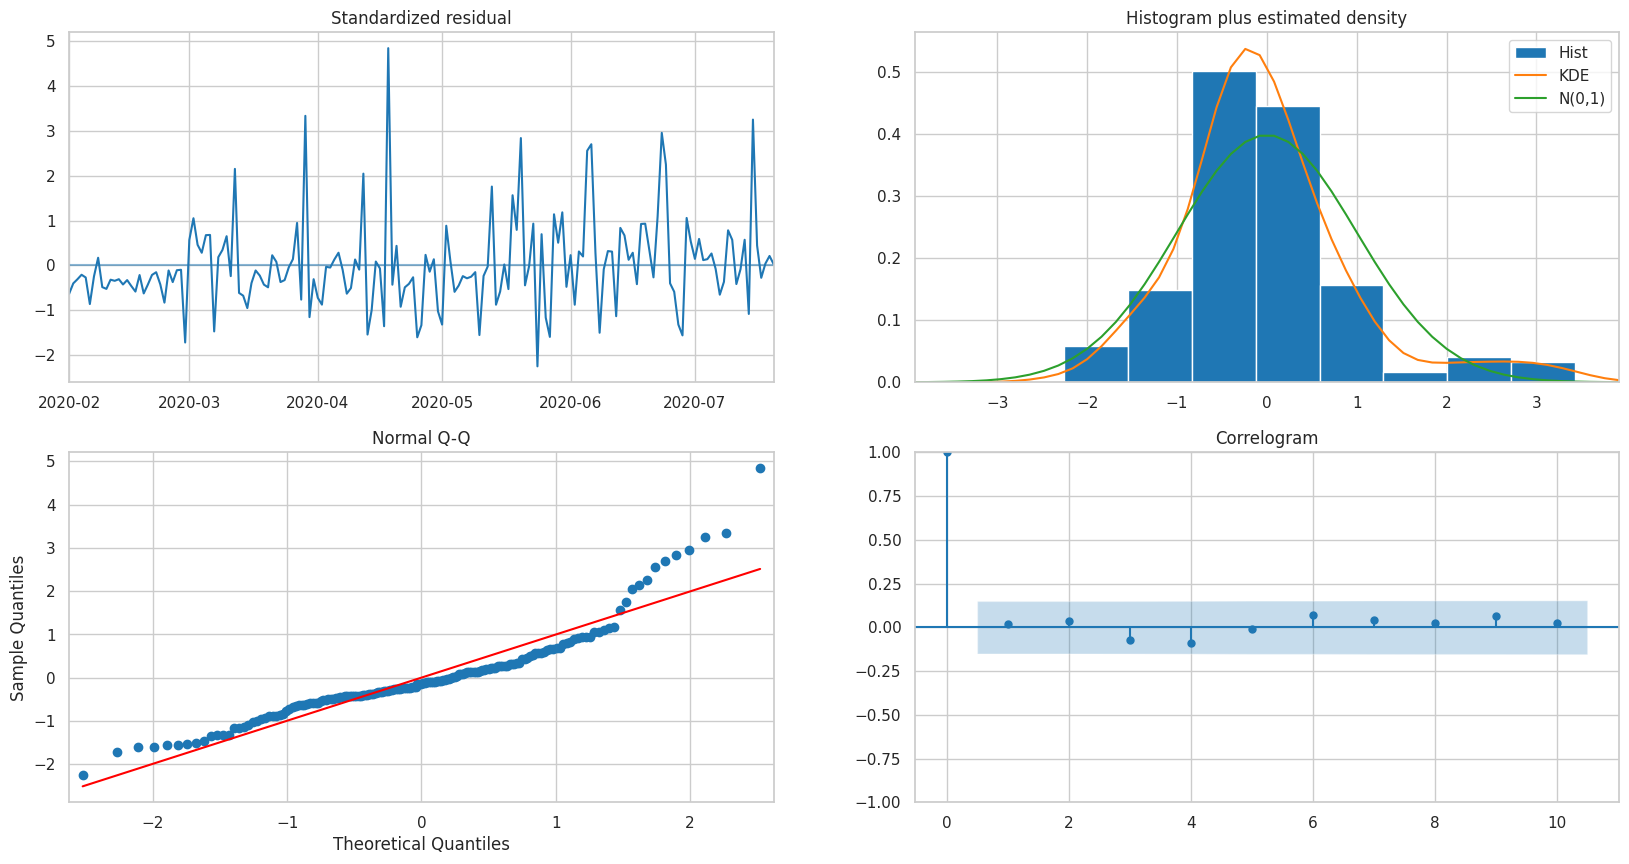

In [ ]:
arima.plot_diagnostics(figsize=(20,10))
plt.show()

**ARIMA Model Diagnostic Analysis:**

**1. Standard Residual Plot:**
   - The standard residual plot displays the residuals over time, comparing them to the horizontal line at zero. In our analysis, we observe a generally horizontal line, which is a positive sign. This indicates that the ARIMA model has successfully captured the underlying trend.

**2. Histogram plus Estimated Density:**
   - The estimated density curve exhibits a peak that is slightly higher than a typical normal distribution. This suggests that the residuals might have a slightly heavier tail compared to a perfect normal distribution.

**3. QQ Plot (Quantile-Quantile Plot)**:
   - The QQ plot is a graphical tool for seeing the normality of the residuals. The QQ plot displays a linear, nearly straight line with minimal deviations from quantiles.

**4. Correlogram:**
   - The correlogram, depicting the autocorrelation and partial autocorrelation functions, helps identify any remaining patterns or correlations in the residuals. In our analysis, all data points fall within the shaded region. This indicates that there are no significant autocorrelations left in the residuals.

The ARIMA model's diagnostic analysis indicates that it generally performs well in capturing the underlying time series patterns.


<Axes: xlabel='timestamp'>

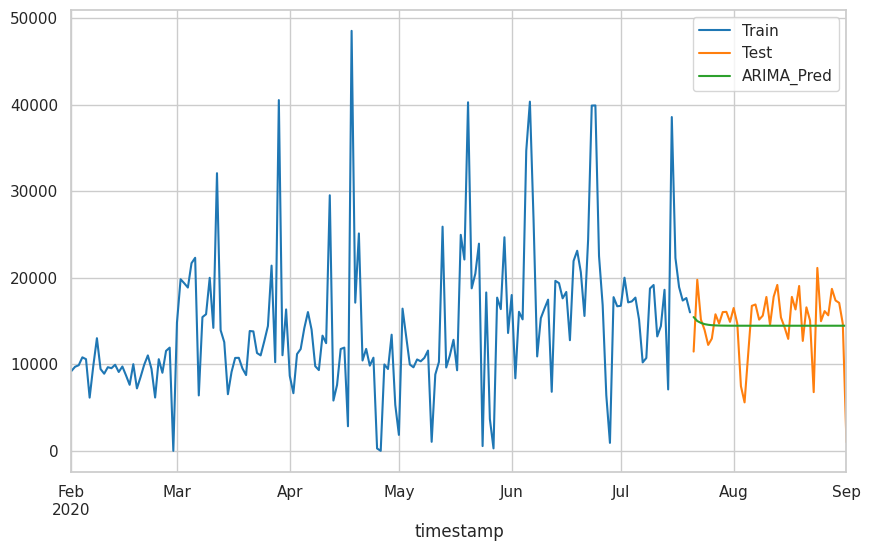

In [ ]:
pred = arima.predict(n_periods = len(test_df) ) # set number of periods
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

In [ ]:
df.columns

Index(['Unnamed: 0', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [ ]:
df2 = df[['TP2','TP3','H1','DV_pressure', 'Oil_temperature', 'COMP', 'DV_eletric', 'MPG']]


In [ ]:
train_df.shape

(171,)

In [ ]:
test_df.shape

(43,)

In [ ]:
df_exo = df2.resample('D').sum().iloc[:,1:]        # Adding exogenous variable into our ARIMA model DAILY BASIS
exo_train = df_exo[:171]
exo_test = df_exo[171:]

In [ ]:
df_exo.shape

(214, 7)

In [ ]:
len(df_exo)

214

In [ ]:
print(exo_train.shape)
print(exo_test.shape)

(171, 7)
(43, 7)


In [ ]:
model = ARIMA(train_df,exog = exo_train, order = (2,0,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Motor_current   No. Observations:                  171
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1457.130
Date:                Sun, 17 Sep 2023   AIC                           2936.261
Time:                        17:49:32   BIC                           2970.819
Sample:                    02-01-2020   HQIC                          2950.283
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             200.1098    436.312      0.459      0.646    -655.047    1055.266
TP3                 0.0870      0.138      0.631      0.528      -0.183       0.357
H1                 -1.3957      0.157     -8.909      0.000      -1.703      -1.089
DV_pressure        -0.5153      0.095     -5.408      0.000      -0.702      -0.329
Oil_temperature     0.0620      0.006     10.186      0.000       0.050       0.074
COMP               14.5383      1.870      7.774      0.000      10.873      18.204
DV_eletric          1.0526      1.288      0.817      0.414      -1.472       3.577
MPG                -5.2555      1.673     -3.141      0.002      -8.535      -1.976
ar.L1               0.4955      0.054      9.154      0.000       0.389       0.602
ar.L2               0.1275      0.075      1.689      0.091      -0.020       0.275
sigma2           1.524e+06      0.003   5.31e+08      0.000    1.52e+06    1.52e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                17.75
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.10
Prob(H) (two-sided):                  0.54   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.4e+27. Standard errors may be unstable.
"""

In [ ]:
pred = model.predict(start = len(train_df), end = len(df_exo)-1, exog = exo_test)                    # start and end index
print("The RMSE is : "+ str(np.sqrt(mean_squared_error(test_df,pred))))

The RMSE is : 846.1590701827253


In [ ]:
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

<Axes: xlabel='timestamp'>

**ARIMA Model PREDICTION**


The visual representation of the ARIMA model's predictions shows that the "ARIMA_Pred" curve closely follows the "Test" data, showcasing a good fit to the data, i.e., the ARIMA model's predictions coincide with the actual testing data points, illustrating its ability to capture both short-term fluctuations and long-term trends.

**The Root Mean Squared Error (RMSE)** of 846.159, obtained from our ARIMA model, states that  a lower RMSE indicates better predictive performance.

**The Normalized Mean Squared Error(NMSE)** of 0.0499 suggests that our model's predictions are very close to the actual values.The low NMSE indicates that our model reliably forecasts future data points.


In [ ]:
mse = mean_squared_error(test_df, pred)
variance = np.var(test_df)
nmse = mse / variance
print(nmse)  # Normalised mean squared error

0.04990182592091798


###HOURLY BASIS [MOTOR CURRENT]


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [ ]:
hour_mean = df1.resample('H')['Motor_current'].sum()

In [ ]:
train_df = hour_mean.iloc[:int(len(hour_mean) * 0.8)]
test_df = hour_mean.iloc[int(len(hour_mean) * 0.8):]

In [ ]:
print(train_df.shape)
print(test_df.shape)

(4092,)
(1024,)


In [ ]:
from pmdarima.arima import auto_arima

arima = auto_arima(train_df,
                   trace=True,
                   error_action='ignore',
                   test='adf',
                   start_p=1,
                   start_q=1,
                   max_p=10,
                   max_q=10,
                   m=1,
                   D=0,
                   suppress_warnings=True,
                   stepwise=True,
                   seasonal=False)

arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=55586.784, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65853.290, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=55623.153, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61826.366, Time=0.61 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=55585.680, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=59681.515, Time=0.88 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=6.38 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=55585.238, Time=0.91 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=58417.102, Time=1.61 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=4.40 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=55562.328, Time=1.24 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=57635.879, Time=5.66 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=8.62 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4092
Model:               SARIMAX(1, 0, 5)   Log Likelihood              -27717.317
Date:                Sun, 17 Sep 2023   AIC                          55450.633
Time:                        17:57:05   BIC                          55501.168
Sample:                    02-01-2020   HQIC                         55468.526
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     60.9899      8.087      7.541      0.000      45.139      76.841
ar.L1          0.9014      0.011     85.207      0.000       0.881       0.922
ma.L1         -0.0696      0.012     -5.630      0.000      -0.094      -0.045
ma.L2          0.0058      0.018      0.325      0.745      -0.029       0.041
ma.L3          0.0196      0.017      1.169      0.243      -0.013       0.053
ma.L4         -0.0372      0.012     -2.985      0.003      -0.062      -0.013
ma.L5         -0.0379      0.017     -2.173      0.030      -0.072      -0.004
sigma2      4.488e+04    498.094     90.109      0.000    4.39e+04    4.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             27728.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima.plot_diagnostics(figsize=(20,10))
plt.show()

**ARIMA Model Diagnostic Analysis:**

**Standard Residual Plot:** The ARIMA model effectively captures the data's trend and seasonality, but a zig-zag pattern hints at unaccounted variability.

**Histogram + Estimated Density:** Residuals have a slightly heavier tail than a perfect normal distribution, suggesting room for improvement in modeling extreme values.

**QQ Plot (Quantile-Quantile):** Residuals closely follow a normal distribution with minor deviations at both ends, indicating potential adjustments for extreme values.

**Correlogram:** Most residuals show no significant autocorrelation, with a single outlier. Minor discrepancies at the plot's edges hint at minor refinements for better performance.


<Axes: xlabel='timestamp'>

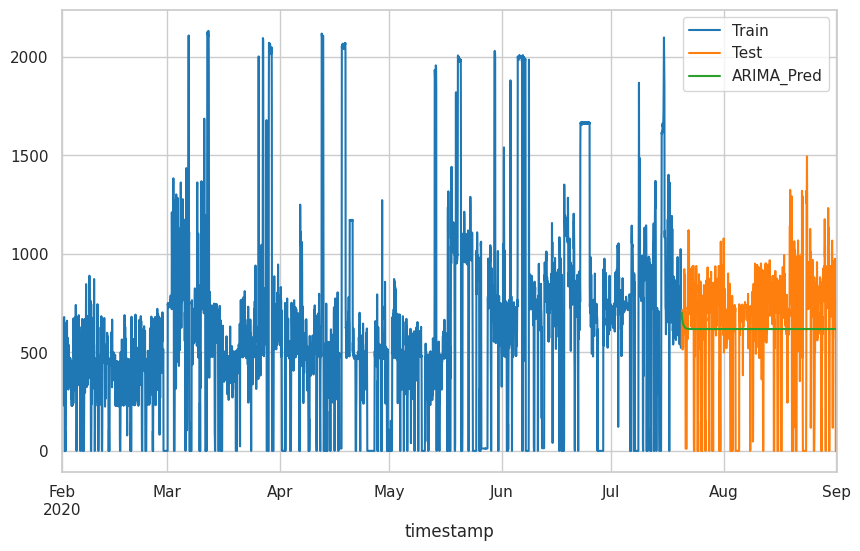

In [ ]:
pred = arima.predict(n_periods = len(test_df) ) # set number of periods
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

In [ ]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [ ]:
df2 = df[['timestamp', 'TP2','TP3','H1','DV_pressure', 'Oil_temperature', 'COMP', 'DV_eletric', 'MPG']]


In [ ]:
df2.head()

timestamp    TP2    TP3     H1  DV_pressure  Oil_temperature  \
0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024           53.600   
1  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022           53.675   
2  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022           53.600   
3  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022           53.425   
4  2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022           53.475   

   COMP  DV_eletric  MPG  
0   1.0         0.0  1.0  
1   1.0         0.0  1.0  
2   1.0         0.0  1.0  
3   1.0         0.0  1.0  
4   1.0         0.0  1.0

In [ ]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')


<ipython-input-119-2a6faf48d3d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = pd.to_datetime(df2['timestamp'])


In [ ]:
train_df = hour_mean.iloc[: int(len(hour_mean) * 0.8)]
test_df = hour_mean.iloc[int(len(hour_mean) * 0.8):]

In [ ]:
train_df.head()

timestamp
2020-02-01 00:00:00    326.6425
2020-02-01 01:00:00    366.4025
2020-02-01 02:00:00    465.1275
2020-02-01 03:00:00    467.0450
2020-02-01 04:00:00    460.7225
Freq: H, Name: Motor_current, dtype: float64

In [ ]:
train_df.shape

(4092,)

In [ ]:
test_df.shape

(1024,)

In [ ]:
df_exo = df2.resample('H').sum().iloc[:, 1:]      # Adding exogenous variable into our ARIMA model DAILY BASIS

In [ ]:
df_exo.shape

(5116, 7)

In [ ]:

exo_test = df_exo[4092:]
exo_train = df_exo[:4092]

In [ ]:
df_exo.shape

(5116, 7)

In [ ]:
len(df_exo)

5116

In [ ]:
print(exo_train.shape)
print(exo_test.shape)

(4092, 7)
(1024, 7)


In [ ]:
print(train_df.shape)
print(exo_train.shape)

(4092,)
(4092, 7)


In [ ]:
model = ARIMA(train_df,exog = exo_train, order = (1,0,5)).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Motor_current   No. Observations:                 4092
Model:                 ARIMA(1, 0, 5)   Log Likelihood              -24007.694
Date:                Sun, 17 Sep 2023   AIC                          48045.388
Time:                        18:03:15   BIC                          48140.139
Sample:                    02-01-2020   HQIC                         48078.936
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1594     11.893     -0.013      0.989     -23.469      23.150
TP3                 0.5111      0.015     34.041      0.000       0.482       0.541
H1                 -0.4493      0.013    -34.865      0.000      -0.475      -0.424
DV_pressure        -0.1386      0.029     -4.861      0.000      -0.195      -0.083
Oil_temperature     0.0471      0.001     33.196      0.000       0.044       0.050
COMP                4.4643      0.141     31.728      0.000       4.189       4.740
DV_eletric         -1.9343      0.097    -20.039      0.000      -2.123      -1.745
MPG                -6.5888      0.086    -76.952      0.000      -6.757      -6.421
ar.L1               0.9397      0.007    139.730      0.000       0.927       0.953
ma.L1              -0.6177      0.010    -62.480      0.000      -0.637      -0.598
ma.L2               0.0052      0.013      0.388      0.698      -0.021       0.031
ma.L3              -0.0518      0.017     -3.015      0.003      -0.086      -0.018
ma.L4              -0.0184      0.016     -1.131      0.258      -0.050       0.014
ma.L5               0.0320      0.016      1.961      0.050    1.66e-05       0.064
sigma2           8015.9236    104.461     76.736      0.000    7811.184    8220.663
===================================================================================
Ljung-Box (L1) (Q):                  14.80   Jarque-Bera (JB):            110886.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -1.70
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred = model.predict(start = len(train_df), end = len(df_exo)-1, exog = exo_test)                    # start and end index
print("The RMSE is : "+ str(np.sqrt(mean_squared_error(test_df,pred))))

The RMSE is : 111.75892237930293


In [ ]:
mse = mean_squared_error(test_df, pred)
variance = np.var(test_df)
nmse = mse / variance
print(nmse)  # Normalised mean squared error

0.1321635437408106


<Axes: xlabel='timestamp'>

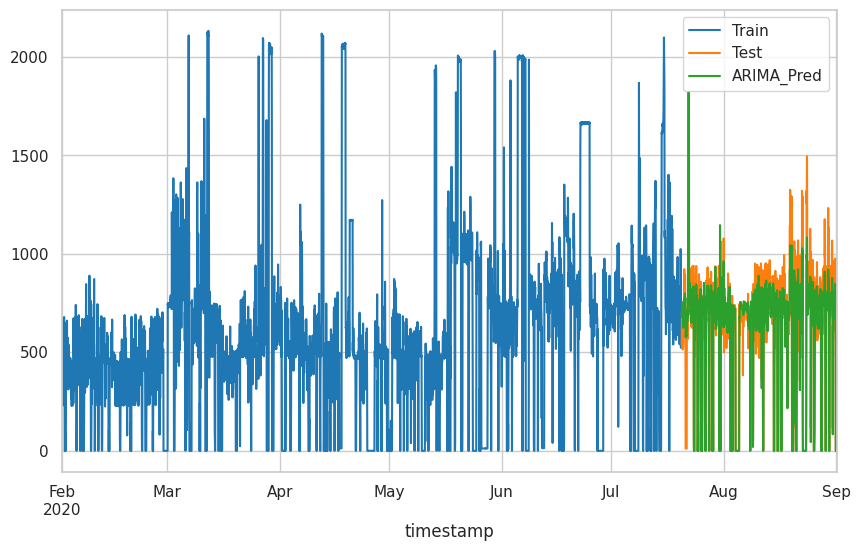

In [ ]:
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

**ARIMA Model PREDICTION**

**The ARIMA model** appears to provide a reasonably good fit to the test data. Although it's difficult to get  exact results from very large datasets due to the large  amount of data(hourly basis), but we can draw conclusion based RMSE and NMSE as :

1. **RMSE (Root Mean Squared Error):** The RMSE value of 111.7589 indicates that, on average, the model's predictions deviate from the actual values by approximately 112 units. This suggests that the model's predictive accuracy is relatively good.

2. **NMSE (Normalized Mean Squared Error):** With an NMSE of 0.1321, the model exhibits relatively low prediction errors, indicating that it explains a significant portion of the variance in the data.



# **THE END**